## Prize Optimization Case Study

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# import data
data = pd.read_csv('price_optimsation_dataset.csv')
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [3]:
# last 5 observations
data.tail(5)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


In [4]:
# random 5 observations
data.sample(5)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
320,computers1,computers_accessories,01-11-2017,6,593.40,16.140000,98.90,45,236,1,...,149.990000,4.2,42.517222,98.90,4.0,16.140000,109.90,3.5,15.520000,98.90
557,garden1,garden_tools,01-10-2017,17,1619.93,41.089412,95.29,58,1893,1,...,59.900000,4.1,18.065897,59.90,4.2,17.595484,59.90,4.1,16.814167,102.50
136,garden4,garden_tools,01-07-2017,13,778.70,15.392308,59.90,57,366,2,...,59.900000,4.1,16.626429,59.90,4.2,16.111579,59.90,4.1,15.392308,59.85
228,health1,health_beauty,01-09-2017,4,339.96,15.600000,84.99,49,1495,3,...,23.990000,4.3,16.120000,89.99,4.1,13.964286,58.99,3.9,15.639200,84.99
472,watches4,watches_gifts,01-02-2018,33,3564.00,18.253636,108.00,58,3006,2,...,128.241667,4.2,15.926667,108.00,4.2,18.253636,182.00,3.8,19.330000,108.00


### Preliminary Assessment

In [13]:
# shape 
data.shape

(676, 30)

In [5]:
# preliminary check of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [6]:
## check for null
data.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [8]:
# check for duplicates
data.duplicated().sum()

0

In [4]:
# categorical features
cat_col = [col for col in data.columns if data[col].dtype == 'object']
cat_col

['product_id', 'product_category_name', 'month_year']

In [5]:
# numerical features
num_col = [col for col in data.columns if col not in cat_col]
print(len(num_col))
num_col

27


['qty',
 'total_price',
 'freight_price',
 'unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_score',
 'customers',
 'weekday',
 'weekend',
 'holiday',
 'month',
 'year',
 's',
 'volume',
 'comp_1',
 'ps1',
 'fp1',
 'comp_2',
 'ps2',
 'fp2',
 'comp_3',
 'ps3',
 'fp3',
 'lag_price']

#### Some findings from Preliminary Assessement
- There are **30 features and 676 observations**
- There are **3 categorical and 27 numerical features**
- There are no missing values in any of the features
- There are also no duplicate observations
- month_year feature is an object type

### Exploratory Data Analysis

In [42]:
# statistical summary of the numerical features overall

data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [43]:
# statistical summary of the categorical features

data[cat_col].describe(include = 'object').T

,count,unique,top,freq
product_id,676,52,health5,20
product_category_name,676,9,garden_tools,160
month_year,676,20,01-03-2018,50


#### Univariate analysis
- First lets perform univariate analysis

In [4]:
## Write a function to analyze Numerical features

def check_num(col_name):
    print('Statistical summary of column {}'.format(col_name))
    print(data[col_name].describe())
    print()
    # get the IQR
    print('Getting the IQR range')
    IQR = np.percentile(data[col_name], 75) - np.percentile(data[col_name], 25)
    print('IQR value: {}'.format(IQR))
    # check for outliers
    print()
    print('Lower side outlier values')
    print(data[data[col_name] < (np.percentile(data[col_name], 25) - (1.5 * IQR))].shape)
    print()
    print('Higher side outlier values')
    print(data[data[col_name] > ((1.5 * IQR) + np.percentile(data[col_name], 75))].shape)
    print()
    print('Plotting the Distribution')
    sns.histplot(data[col_name])
    plt.title(col_name + ' Column Distribution')
    plt.show()
    print()
    print('Plotting the boxplot')
    sns.boxplot(data, x = col_name)
    plt.title(col_name + ' Column Boxplot')
    plt.show();

In [32]:
# numerical columns without competitor prices
num_cols_2 = ['qty',
 'total_price',
 'freight_price',
 'unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_score',
 'customers',
 'weekday',
 'weekend',
 'holiday',
 'month',
 'year',
 's',
 'volume']

Statistical summary of column qty
count    676.000000
mean      14.495562
std       15.443421
min        1.000000
25%        4.000000
50%       10.000000
75%       18.000000
max      122.000000
Name: qty, dtype: float64

Getting the IQR range
IQR value: 14.0

Lower side outlier values
(0, 30)

Higher side outlier values
(42, 30)

Plotting the Distribution


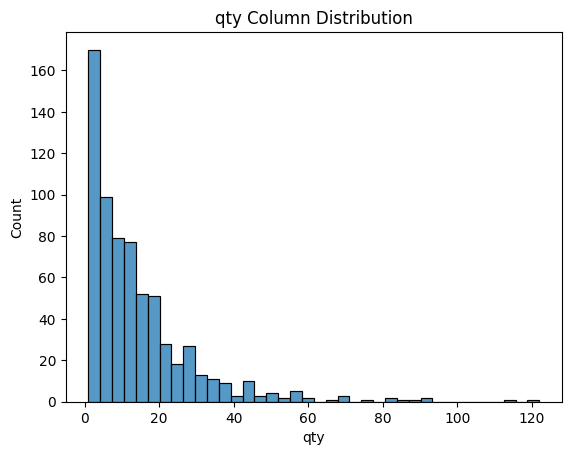


Plotting the boxplot


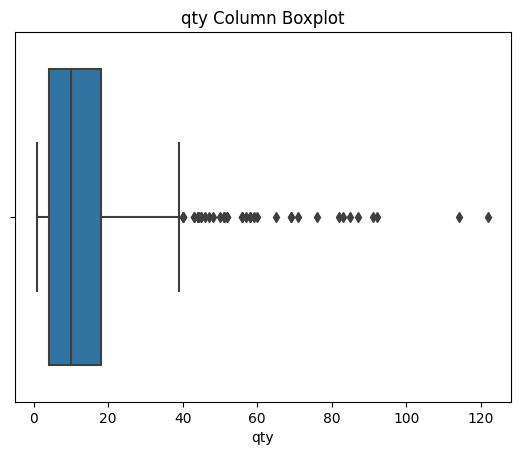

Statistical summary of column total_price
count      676.000000
mean      1422.708728
std       1700.123100
min         19.900000
25%        333.700000
50%        807.890000
75%       1887.322500
max      12095.000000
Name: total_price, dtype: float64

Getting the IQR range
IQR value: 1553.6225

Lower side outlier values
(0, 30)

Higher side outlier values
(46, 30)

Plotting the Distribution


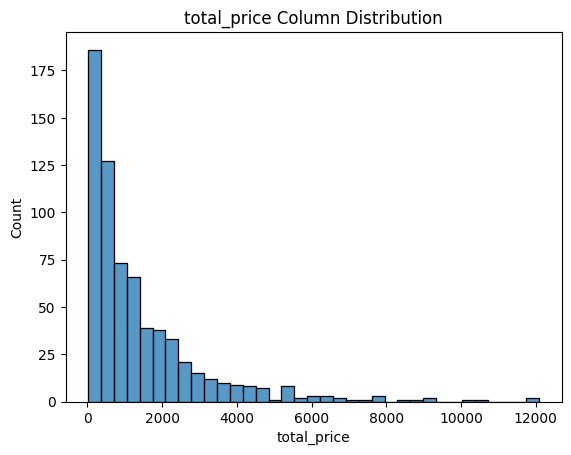


Plotting the boxplot


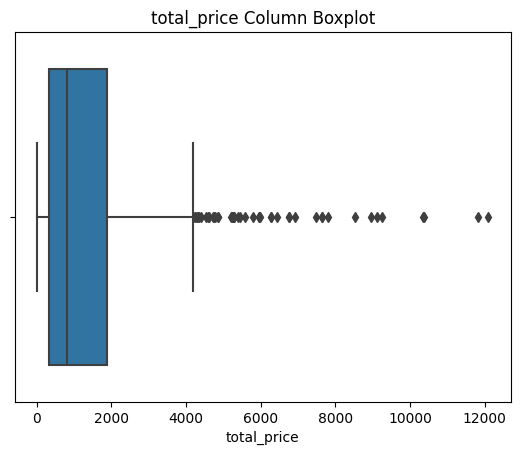

Statistical summary of column freight_price
count    676.000000
mean      20.682270
std       10.081817
min        0.000000
25%       14.761912
50%       17.518472
75%       22.713558
max       79.760000
Name: freight_price, dtype: float64

Getting the IQR range
IQR value: 7.951645922500003

Lower side outlier values
(3, 30)

Higher side outlier values
(73, 30)

Plotting the Distribution


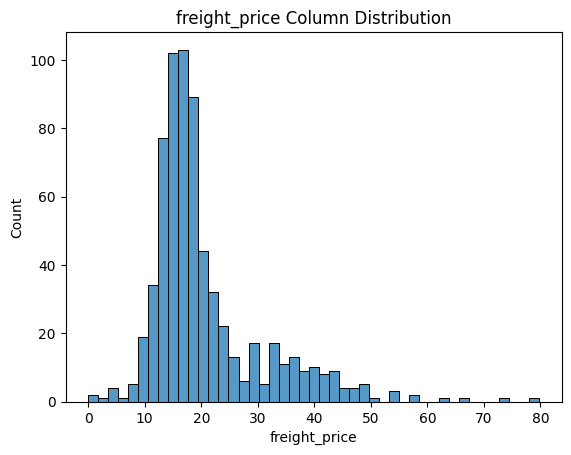


Plotting the boxplot


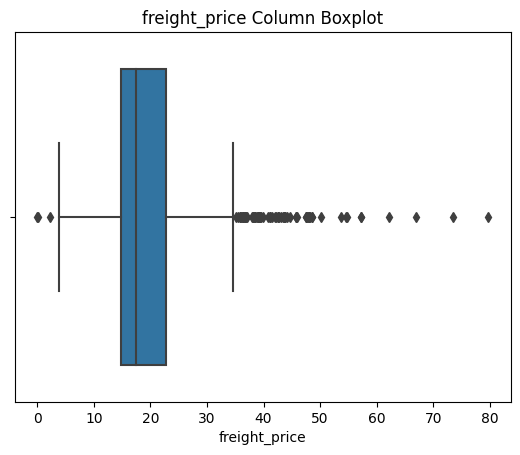

Statistical summary of column unit_price
count    676.000000
mean     106.496800
std       76.182972
min       19.900000
25%       53.900000
50%       89.900000
75%      129.990000
max      364.000000
Name: unit_price, dtype: float64

Getting the IQR range
IQR value: 76.09

Lower side outlier values
(0, 30)

Higher side outlier values
(45, 30)

Plotting the Distribution


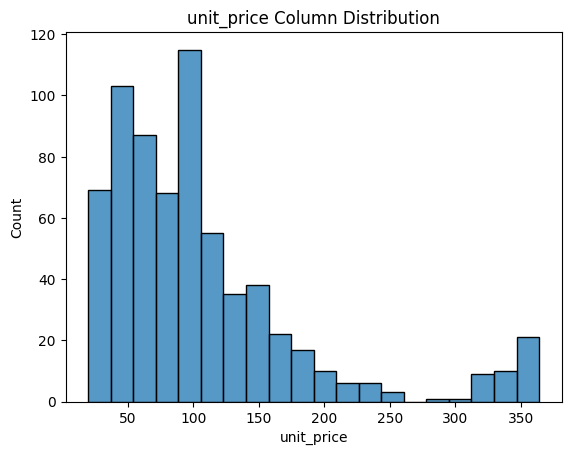


Plotting the boxplot


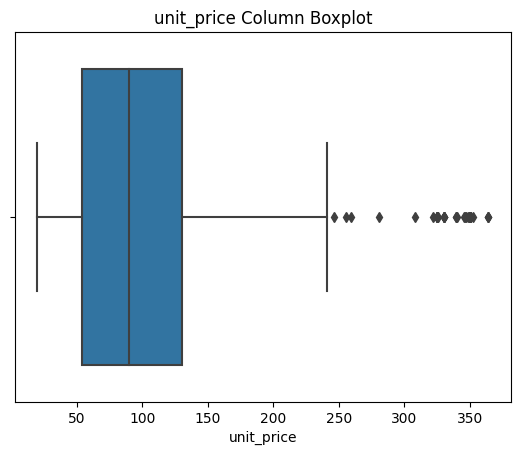

Statistical summary of column product_name_lenght
count    676.000000
mean      48.720414
std        9.420715
min       29.000000
25%       40.000000
50%       51.000000
75%       57.000000
max       60.000000
Name: product_name_lenght, dtype: float64

Getting the IQR range
IQR value: 17.0

Lower side outlier values
(0, 30)

Higher side outlier values
(0, 30)

Plotting the Distribution


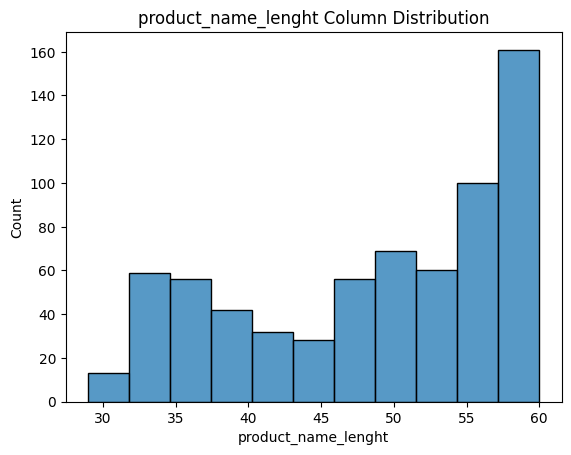


Plotting the boxplot


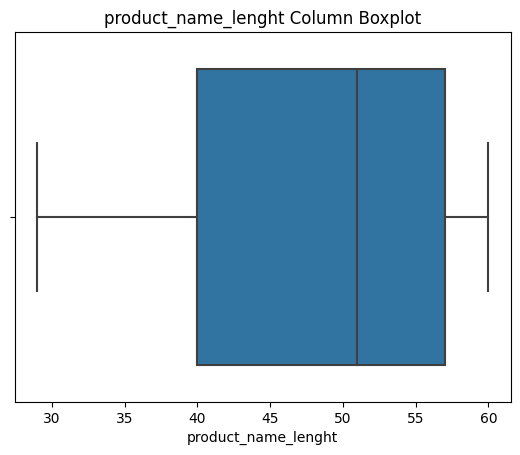

Statistical summary of column product_description_lenght
count     676.000000
mean      767.399408
std       655.205015
min       100.000000
25%       339.000000
50%       501.000000
75%       903.000000
max      3006.000000
Name: product_description_lenght, dtype: float64

Getting the IQR range
IQR value: 564.0

Lower side outlier values
(0, 30)

Higher side outlier values
(91, 30)

Plotting the Distribution


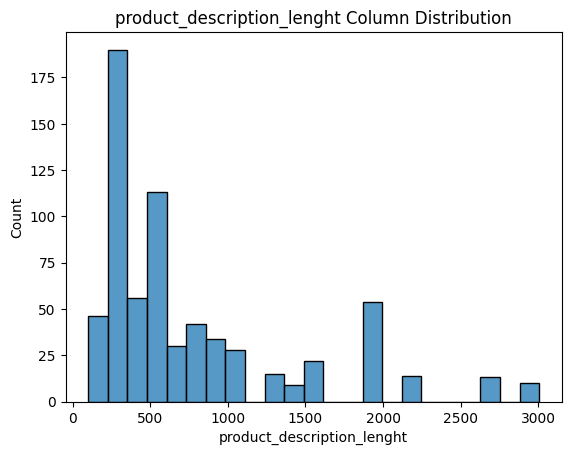


Plotting the boxplot


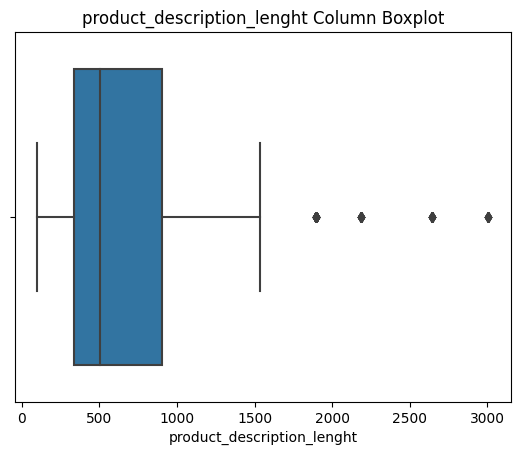

Statistical summary of column product_photos_qty
count    676.000000
mean       1.994083
std        1.420473
min        1.000000
25%        1.000000
50%        1.500000
75%        2.000000
max        8.000000
Name: product_photos_qty, dtype: float64

Getting the IQR range
IQR value: 1.0

Lower side outlier values
(0, 30)

Higher side outlier values
(87, 30)

Plotting the Distribution


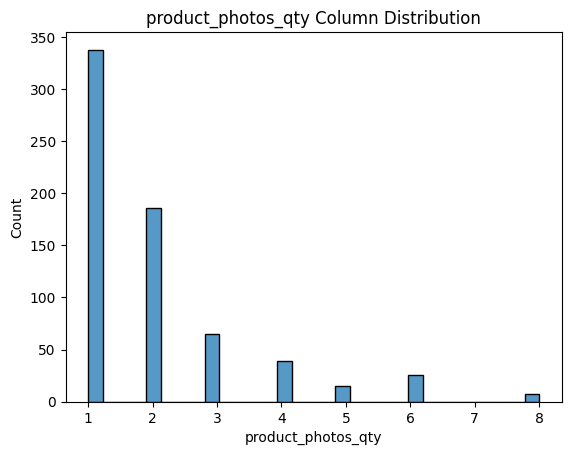


Plotting the boxplot


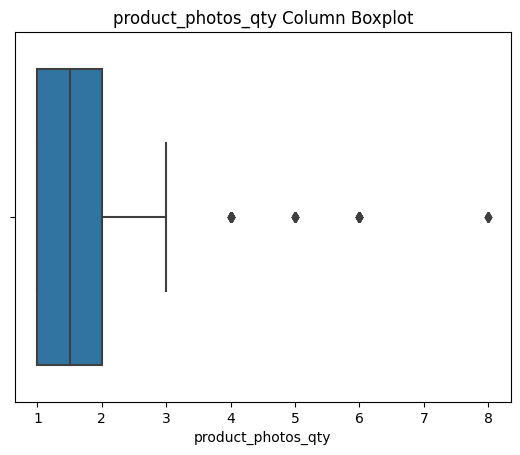

Statistical summary of column product_weight_g
count     676.000000
mean     1847.498521
std      2274.808483
min       100.000000
25%       348.000000
50%       950.000000
75%      1850.000000
max      9750.000000
Name: product_weight_g, dtype: float64

Getting the IQR range
IQR value: 1502.0

Lower side outlier values
(0, 30)

Higher side outlier values
(117, 30)

Plotting the Distribution


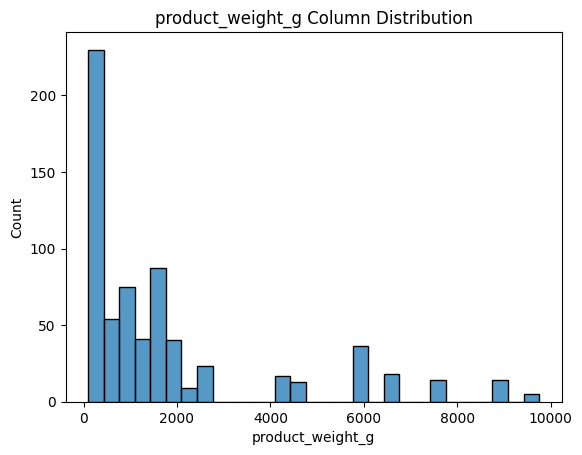


Plotting the boxplot


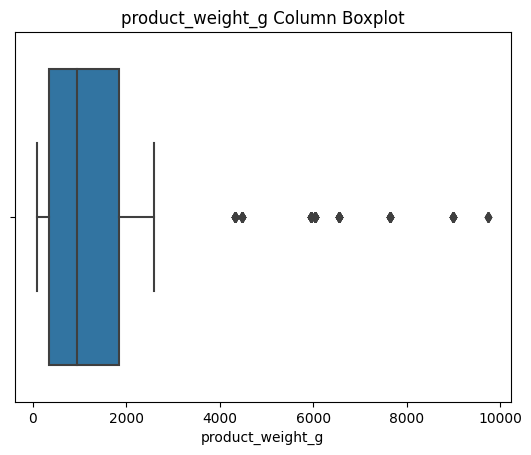

Statistical summary of column product_score
count    676.000000
mean       4.085503
std        0.232021
min        3.300000
25%        3.900000
50%        4.100000
75%        4.200000
max        4.500000
Name: product_score, dtype: float64

Getting the IQR range
IQR value: 0.30000000000000027

Lower side outlier values
(11, 30)

Higher side outlier values
(0, 30)

Plotting the Distribution


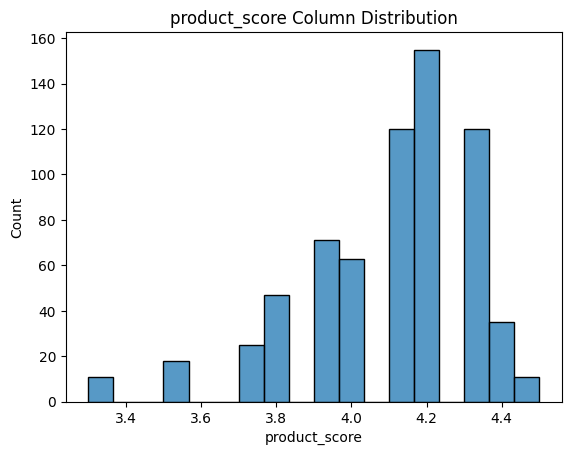


Plotting the boxplot


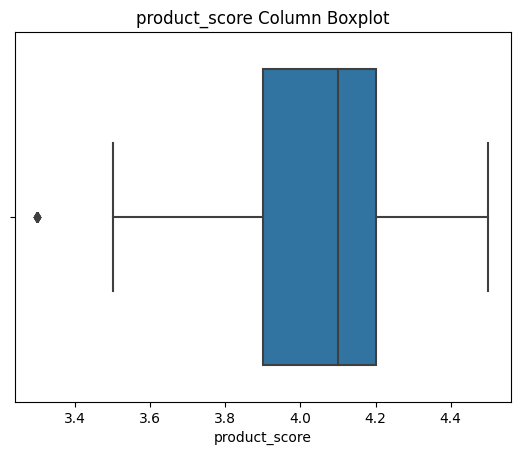

Statistical summary of column customers
count    676.000000
mean      81.028107
std       62.055560
min        1.000000
25%       34.000000
50%       62.000000
75%      116.000000
max      339.000000
Name: customers, dtype: float64

Getting the IQR range
IQR value: 82.0

Lower side outlier values
(0, 30)

Higher side outlier values
(18, 30)

Plotting the Distribution


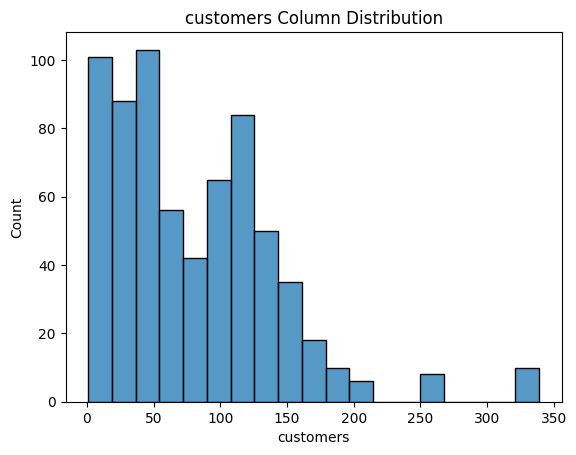


Plotting the boxplot


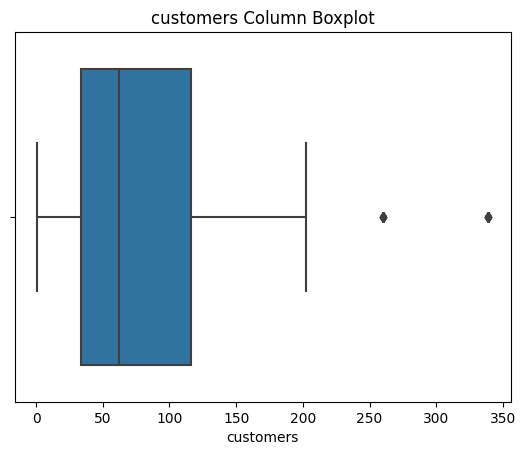

Statistical summary of column weekday
count    676.000000
mean      21.773669
std        0.986104
min       20.000000
25%       21.000000
50%       22.000000
75%       23.000000
max       23.000000
Name: weekday, dtype: float64

Getting the IQR range
IQR value: 2.0

Lower side outlier values
(0, 30)

Higher side outlier values
(0, 30)

Plotting the Distribution


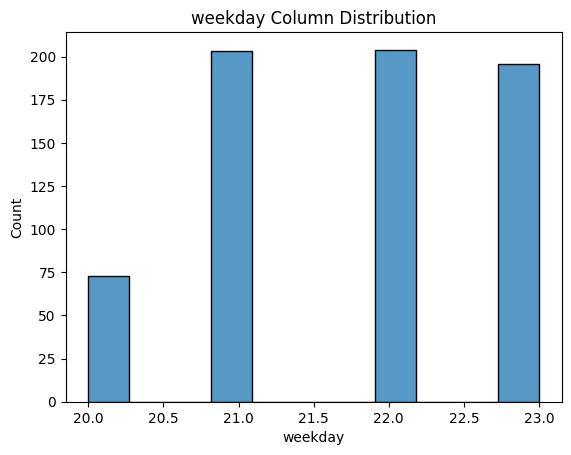


Plotting the boxplot


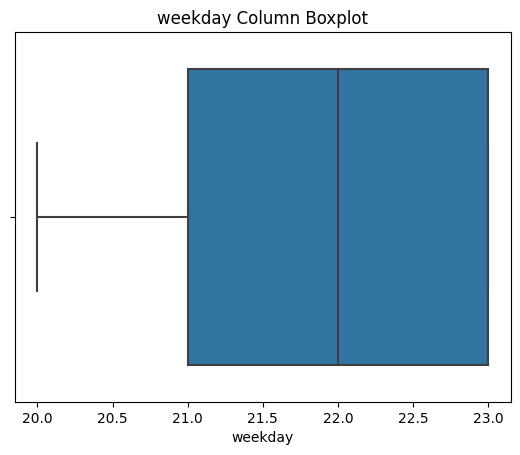

Statistical summary of column weekend
count    676.000000
mean       8.658284
std        0.705600
min        8.000000
25%        8.000000
50%        9.000000
75%        9.000000
max       10.000000
Name: weekend, dtype: float64

Getting the IQR range
IQR value: 1.0

Lower side outlier values
(0, 30)

Higher side outlier values
(0, 30)

Plotting the Distribution


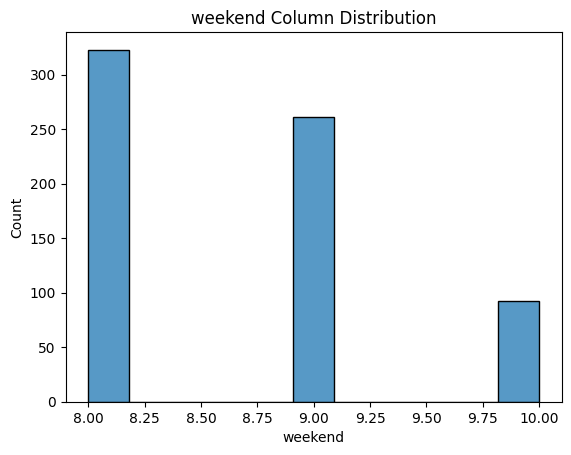


Plotting the boxplot


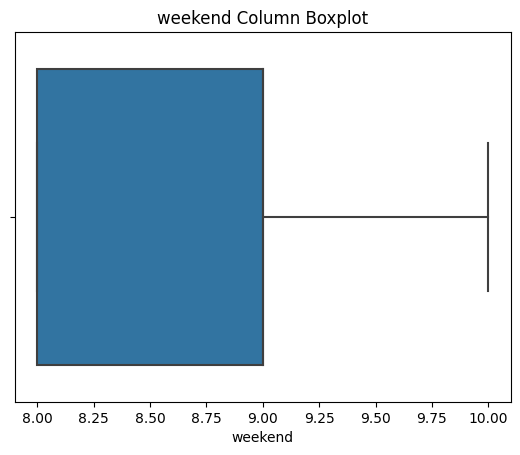

Statistical summary of column holiday
count    676.000000
mean       1.494083
std        0.940430
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: holiday, dtype: float64

Getting the IQR range
IQR value: 1.0

Lower side outlier values
(0, 30)

Higher side outlier values
(44, 30)

Plotting the Distribution


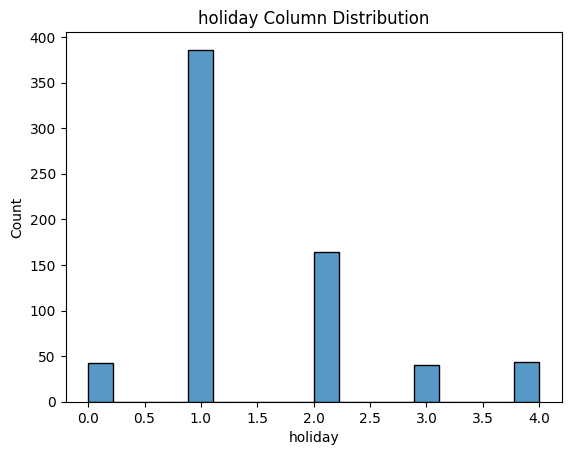


Plotting the boxplot


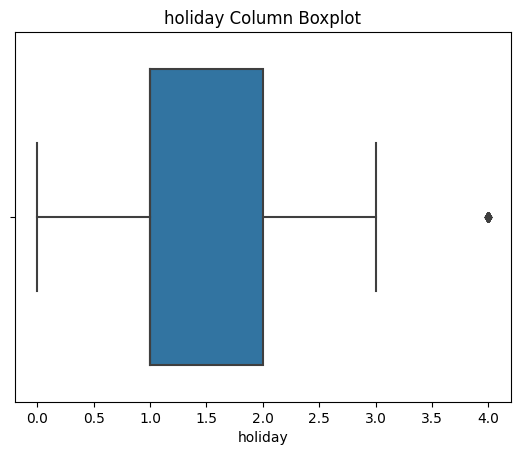

Statistical summary of column month
count    676.000000
mean       6.192308
std        3.243455
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       12.000000
Name: month, dtype: float64

Getting the IQR range
IQR value: 5.0

Lower side outlier values
(0, 30)

Higher side outlier values
(0, 30)

Plotting the Distribution


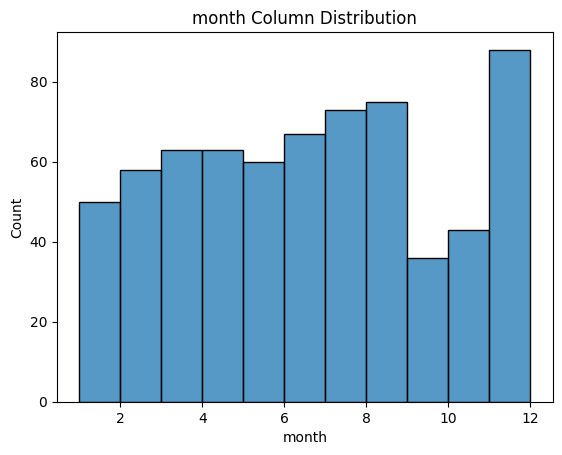


Plotting the boxplot


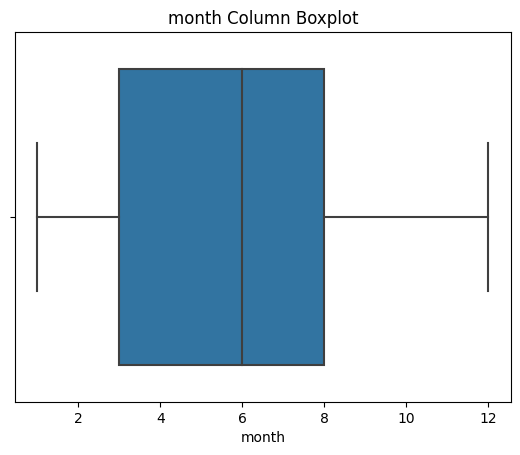

Statistical summary of column year
count     676.000000
mean     2017.525148
std         0.499737
min      2017.000000
25%      2017.000000
50%      2018.000000
75%      2018.000000
max      2018.000000
Name: year, dtype: float64

Getting the IQR range
IQR value: 1.0

Lower side outlier values
(0, 30)

Higher side outlier values
(0, 30)

Plotting the Distribution


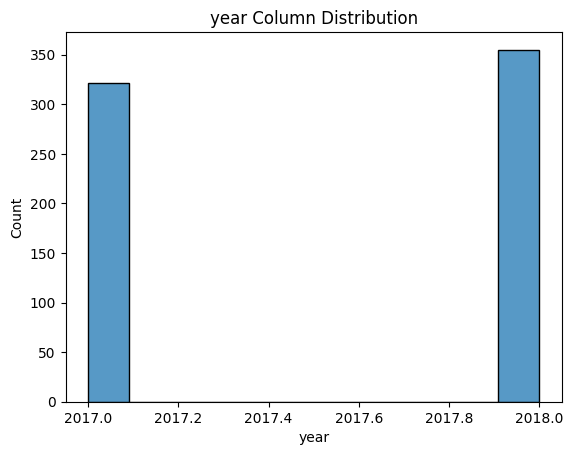


Plotting the boxplot


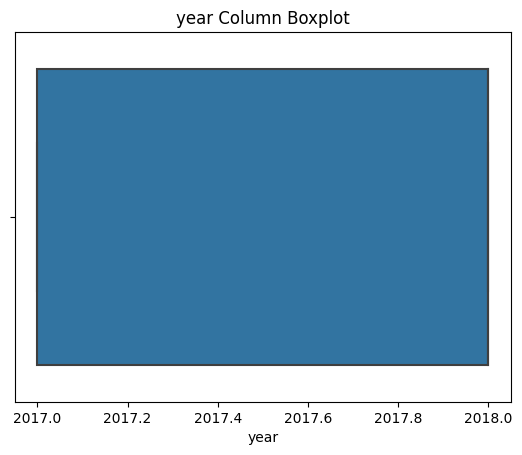

Statistical summary of column s
count    676.000000
mean      14.644970
std       11.930276
min        0.484262
25%        7.510204
50%       11.316760
75%       17.745704
max      100.000000
Name: s, dtype: float64

Getting the IQR range
IQR value: 10.235499865499998

Lower side outlier values
(0, 30)

Higher side outlier values
(53, 30)

Plotting the Distribution


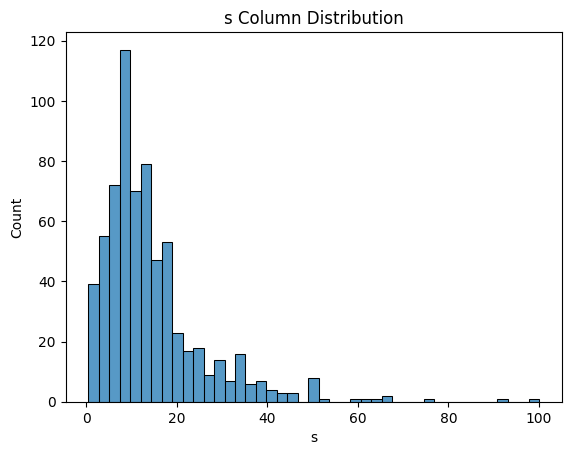


Plotting the boxplot


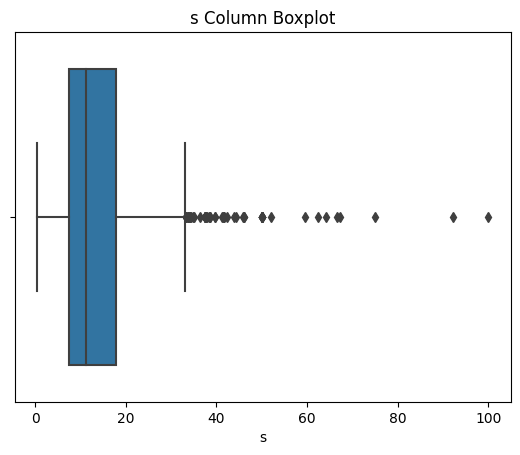

Statistical summary of column volume
count      676.000000
mean     10664.627219
std       9172.801850
min        640.000000
25%       3510.000000
50%       8000.000000
75%      15750.000000
max      32736.000000
Name: volume, dtype: float64

Getting the IQR range
IQR value: 12240.0

Lower side outlier values
(0, 30)

Higher side outlier values
(0, 30)

Plotting the Distribution


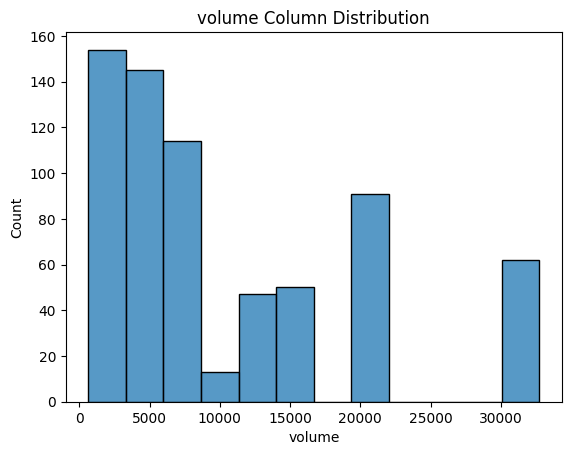


Plotting the boxplot


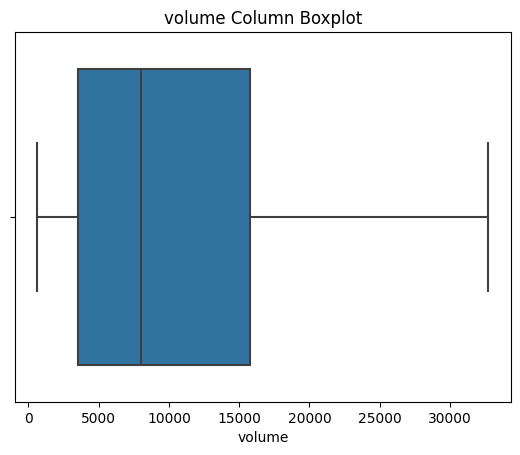

In [37]:
## perform univariate analysis for numerical features without competitor metrics

for col in num_cols_2:
    check_num(col)

### Some findings from the numerical features univariate analysis:
#### qty :
- right skewed distribution
- around 25% of customers bought less than or equal to 4 items per month, around 50% bought less than or equal to 10 and 75% bought less than or equal to 18 and mean of around 15 items bought month.
- min number of item bought is 1 and max item bought is 122
- there are around 42 outliers values on the higher side.

#### total_price :
- again right skewed distribution
- around 25% of customers spends less than or equal to 334 items per month, around 50% spends less than or equal to 808 and 75% bought less than or equal to 1887 and mean of around 15 items bought per month.
- min amount spent is around 20 and max item bought is 12095
- there are around 46 outliers values on the higher side.

#### freight_price :
- can see little skewness on the right but also some tail on the left
- most of the prices lies around 10 to 30
- around 25% of freights prices is less than or equal to 15 units items per month, around 50% of freights prices is less than or equal to 18 units and 75% of freights prices is less than or equal to 23 units
- min price is 0 and max is around 80
- there are 3 outliers values on the lower side and 73 outliers values on the higher side.


#### unit_price :
- observed some skewness on the right
- around 25% of product price is less than or equal to around 54 units, around 50% of product price is less than or equal to around 90 units and around 75% of product price is less than or equal to around 130 units
- min price is 20 and max is around 364
- there are 45 outliers values on the higher side.


#### seasonality :
- right skewed distribution
- around 25% of seasonality score is less than or equal to around 7.5 units, around 50% of seasonality score is less than or equal to around 11.31 units and around 75% of seasonality score is less than or equal to around 18 units with an average score around 15 units 
- min price is aruond 0 and max is around 100
- there are 53 outliers values on the higher side.

- product_score seems categorical in nature, so will check with rest the categorical features.
- Rest of the numerical features findings are not listed. Their relevant analysis with other features will be done later

In [157]:
# Write a function to check categorical column
def check_cat(col_name, data):
    # data type of the column
    print('Data type: ', data[col_name].dtype)
    # display unique values in the column
    print('Unique Values in the {} column: {}'.format(col_name, data[col_name].unique()))
    print()
    print('Values counts:')
    data[col_name].value_counts()
    print(data[col_name].value_counts())
    print()
    print('Ratio of different types of values in the {} column'.format(col_name))
    print(data[col_name].value_counts()/len(data) * 100)

    # visual plot of the different types of values and their counts in the column
    data[col_name].value_counts().plot(kind = 'bar', color = 'g')
    plt.title('Types of Different Values in {}'.format(col_name))
    plt.xticks(rotation=0)
    plt.show();

Data type:  object
Unique Values in the product_category_name column: ['bed_bath_table' 'garden_tools' 'consoles_games' 'health_beauty'
 'cool_stuff' 'perfumery' 'computers_accessories' 'watches_gifts'
 'furniture_decor']

Values counts:
product_category_name
garden_tools             160
health_beauty            130
watches_gifts            103
computers_accessories     69
bed_bath_table            61
cool_stuff                57
furniture_decor           48
perfumery                 26
consoles_games            22
Name: count, dtype: int64

Ratio of different types of values in the product_category_name column
product_category_name
garden_tools             23.668639
health_beauty            19.230769
watches_gifts            15.236686
computers_accessories    10.207101
bed_bath_table            9.023669
cool_stuff                8.431953
furniture_decor           7.100592
perfumery                 3.846154
consoles_games            3.254438
Name: count, dtype: float64


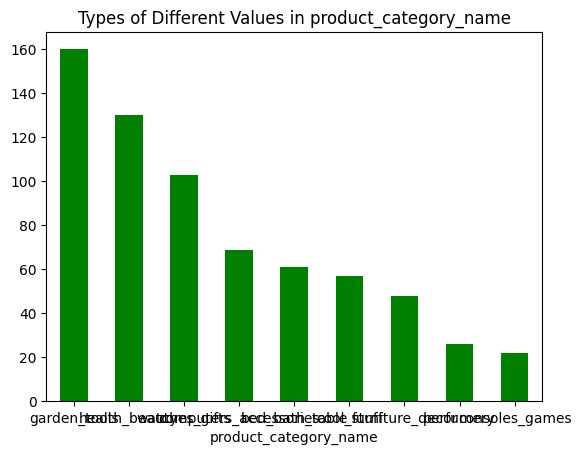

In [158]:
# product_category_name
check_cat('product_category_name', data)

Data type:  float64
Unique Values in the product_score column: [4.  4.1 4.2 4.3 3.8 3.5 3.9 4.4 3.3 3.7 4.5]

Values counts:
product_score
4.2    155
4.1    120
4.3    120
3.9     71
4.0     63
3.8     47
4.4     35
3.7     25
3.5     18
3.3     11
4.5     11
Name: count, dtype: int64

Ratio of different types of values in the product_score column
product_score
4.2    22.928994
4.1    17.751479
4.3    17.751479
3.9    10.502959
4.0     9.319527
3.8     6.952663
4.4     5.177515
3.7     3.698225
3.5     2.662722
3.3     1.627219
4.5     1.627219
Name: count, dtype: float64


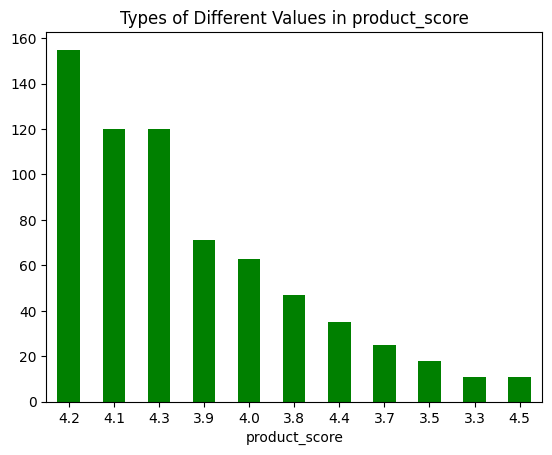

In [40]:
# check for product_score
check_cat('product_score', data)

### Some findings
- **11 unique product score values with minimum at 3.3 and maximum score of 4.5**
- around **22% of the products have score 4.2, 18% with 4.1 and 4.3**.
- Only aroun  1.7% of the products have the minimum and max score of 3.3 and 4.5

In [21]:
## correlation among the numerical variables without the competitor prices
# competitor prices will be check with unit price
data[num_cols_2].corr()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume
qty,1.000000,0.749605,-0.135521,-0.103432,0.079973,-0.022749,0.128515,-0.034301,-0.004028,0.441547,0.030918,-0.075118,0.211610,-0.005129,0.058562,0.411001,0.049827
total_price,0.749605,1.000000,0.025848,0.409001,-0.002594,0.175376,0.157945,0.060092,0.036119,0.386389,0.018798,-0.053788,0.136558,-0.029918,0.082140,0.334500,-0.088726
freight_price,-0.135521,0.025848,1.000000,0.203659,0.013398,0.423219,-0.200990,0.670689,0.199468,0.088261,-0.016132,0.030275,-0.081518,-0.028336,0.076595,-0.109359,0.122097
unit_price,-0.103432,0.409001,0.203659,1.000000,-0.170613,0.280176,0.076990,0.112958,0.042162,0.043391,-0.011949,-0.000042,0.012573,-0.004249,-0.068072,-0.016552,-0.197233
product_name_lenght,0.079973,-0.002594,0.013398,-0.170613,1.000000,0.124510,0.131951,-0.044050,0.163520,0.082239,0.023797,-0.018183,-0.014317,-0.004250,-0.035479,-0.080830,0.329476
product_description_lenght,-0.022749,0.175376,0.423219,0.280176,0.124510,1.000000,0.060124,0.386973,0.187544,0.067497,-0.019320,-0.012465,0.018342,-0.029561,0.030949,0.001335,-0.141580
product_photos_qty,0.128515,0.157945,-0.200990,0.076990,0.131951,0.060124,1.000000,-0.129291,0.048286,-0.022536,0.022311,0.008326,-0.008898,0.041728,0.033602,0.083799,-0.153538
product_weight_g,-0.034301,0.060092,0.670689,0.112958,-0.044050,0.386973,-0.129291,1.000000,0.178678,0.053523,-0.029960,0.011309,-0.003266,-0.011176,-0.108361,-0.050676,0.251966
product_score,-0.004028,0.036119,0.199468,0.042162,0.163520,0.187544,0.048286,0.178678,1.000000,0.020185,0.003121,-0.010396,-0.009899,-0.004952,-0.053070,-0.051636,0.117887
customers,0.441547,0.386389,0.088261,0.043391,0.082239,0.067497,-0.022536,0.053523,0.020185,1.000000,0.029810,-0.111806,0.310254,-0.022852,0.218272,0.214383,0.041641


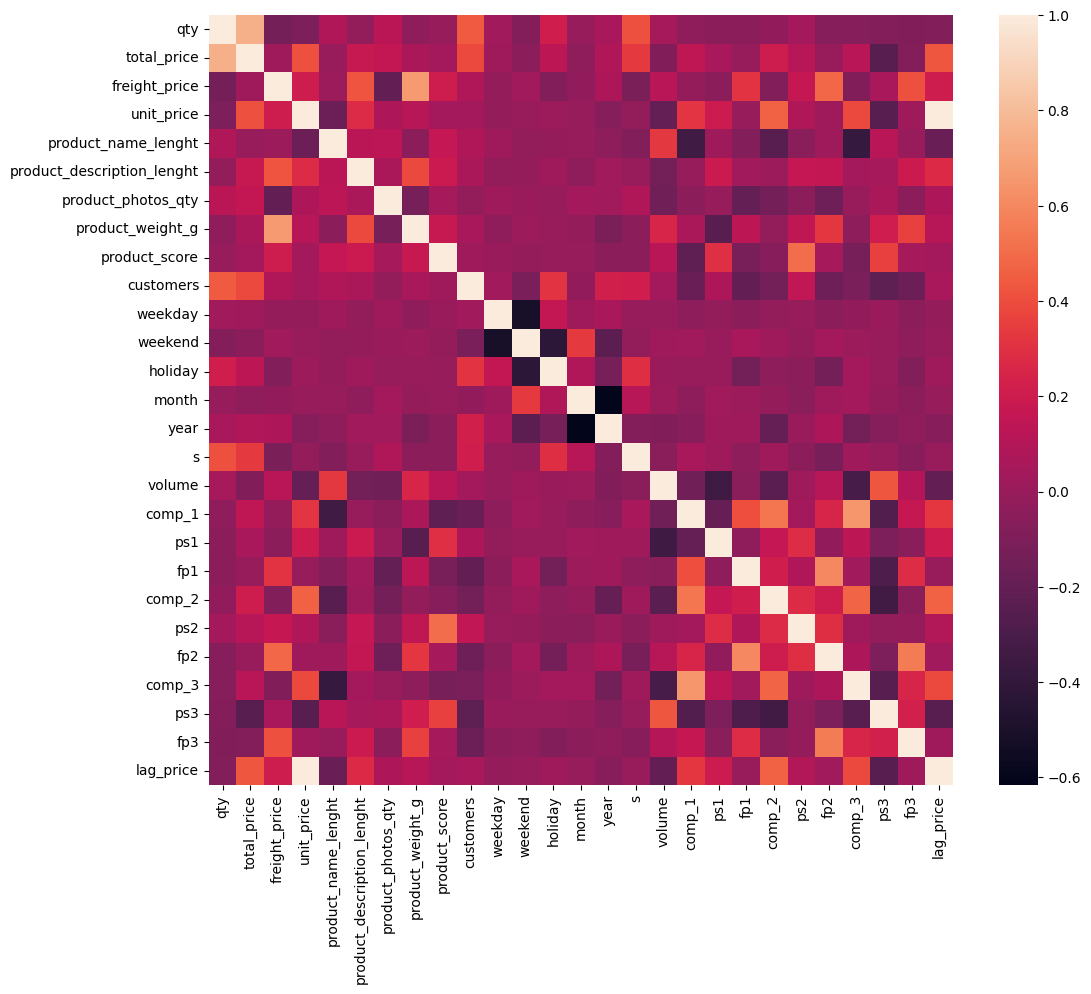

In [8]:
## heat map
plt.figure(figsize= (12, 10))
sns.heatmap(data[num_col].corr())
plt.show();

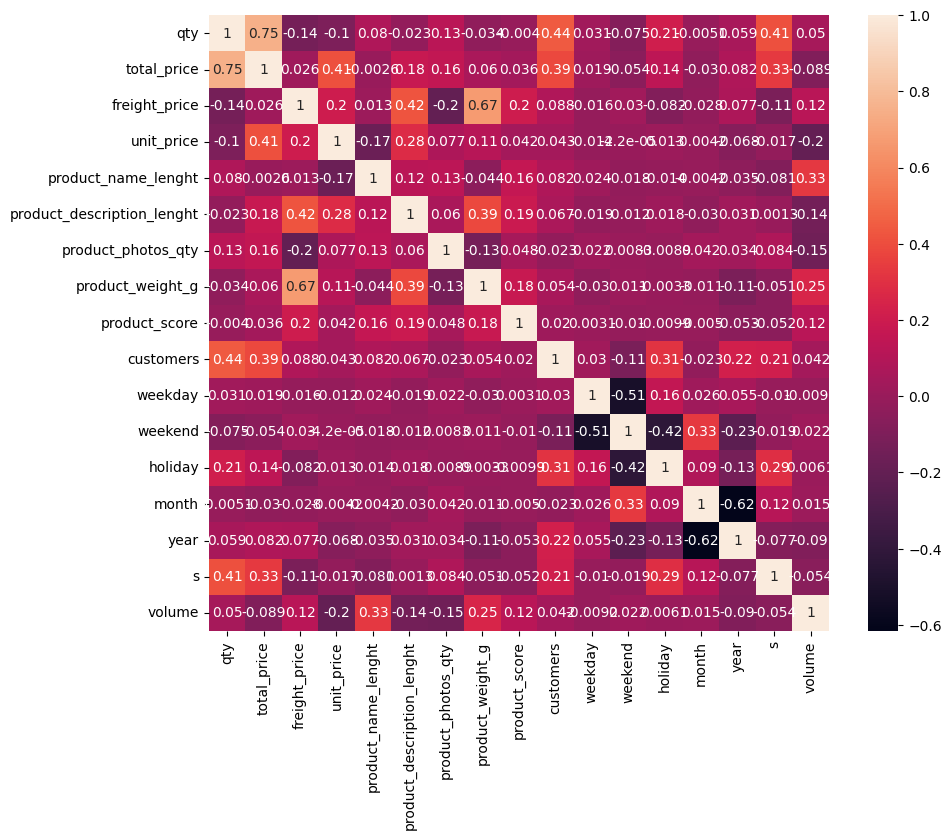

In [24]:
## heat map
plt.figure(figsize= (10, 8))
sns.heatmap(data[num_cols_2].corr(), annot=True)
plt.show();

In [4]:
## lets check for corelation values and competitor prices

nums_cols_3 = ['unit_price', 'product_score', 'freight_price','comp_1',
 'ps1',
 'fp1',
 'comp_2',
 'ps2',
 'fp2',
 'comp_3',
 'ps3',
 'fp3',
 'lag_price']

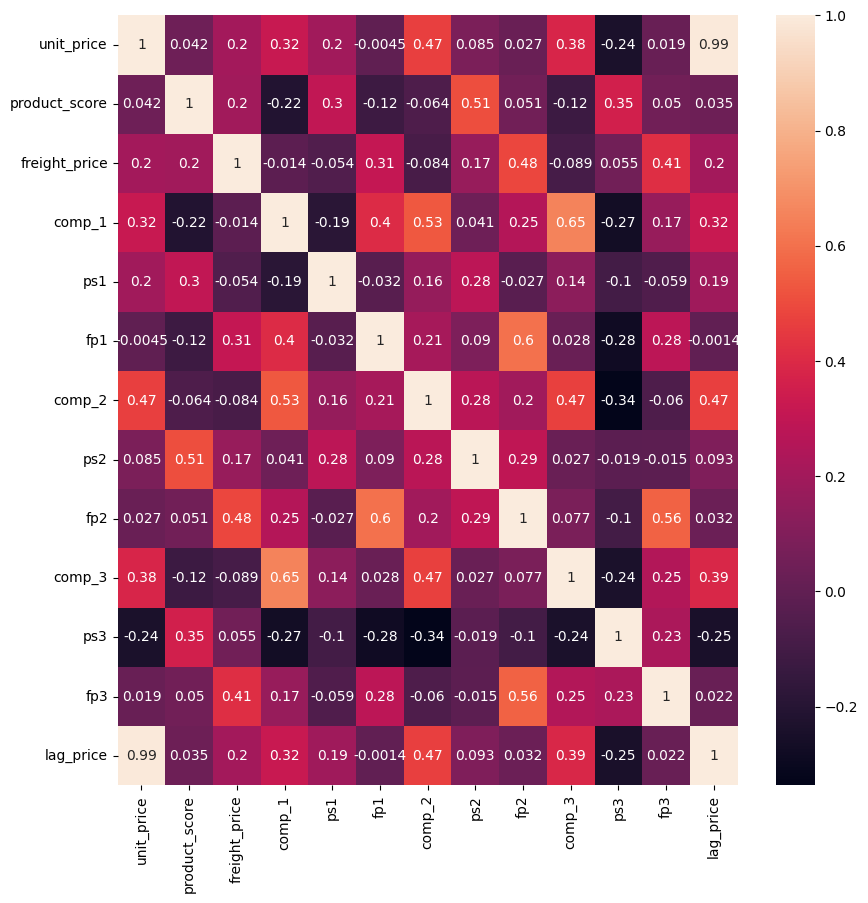

In [5]:
# correlation
plt.figure(figsize=(10, 10))
sns.heatmap(data[nums_cols_3].corr(), annot=True)
plt.show()

- Seems there is some correlation of **around 0.47 with comp_2, and of 0.32 and 0.38 with comp_1 and comp_3 respectively**.

### Data Pre-Processing and Feature Engineering
- There are some features that we found their distribution heavily skewed and hence some outliers. We will need to handle the outliers based on the relevant features and the pricing strategy we will be doing. This will be handled later on.
- convert month_year feature to datetime type
#### Feature Engineering
- We will need to calculate the following: *( Below calculations are for each observation - here each observation is a aggreation of monthly transaction for each product )*
    - **Revenue: This will be given by the total_price itself as total_price = unit_price * qty**
    - **Total Cost: Since there is no other cost mentioned, I'm assuming the cost incurred for each product to be the freight price.**
    - **So Total Cost = Freight * qty** at each observation level.
    - **Profit : Revenue - Total Cost** at each observation level.
    - **Profit Margin : (Profit/Revenue) * 100** at each observation level.

In [45]:
# convert to date time type
data['month_year'] = pd.to_datetime(data['month_year'])

In [5]:
## create features for revenue, total_cost, profit and profit_margin
# we dont need to create revenue column as total_price feature is the revenue itself.

# create total cost
data['total_cost'] = data['freight_price'] * data['qty']

# profit
data['profit'] = data['total_price'] - data['total_cost']

# profit margin
data['profit_margin'] = (data['profit']/data['total_price']) * 100

In [10]:
# check data
data[['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price','customers','total_cost', 'profit', 'profit_margin']].head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,customers,total_cost,profit,profit_margin
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,57,15.10,30.85,67.138194
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,61,38.80,99.05,71.853464
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,123,89.04,186.66,67.704026
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,90,57.15,126.65,68.906420
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,54,30.20,61.70,67.138194


#### Some More EDA
- Lets do some **bi-variate analysis based on the price, revenue, seasonality, trends, competitor prices etc with majorly the revenue**

In [329]:
## unit price and product_category_name
data.groupby('product_category_name')['unit_price'].mean()

product_category_name
bed_bath_table            78.629278
computers_accessories    119.482323
consoles_games            27.033766
cool_stuff               107.857512
furniture_decor           60.154262
garden_tools              80.094699
health_beauty            107.620222
perfumery                 89.348813
watches_gifts            156.869869
Name: unit_price, dtype: float64

In [324]:
# product categories and revenue
data.groupby('product_category_name')['total_price'].mean()

product_category_name
bed_bath_table           1558.762623
computers_accessories    2059.390580
consoles_games            263.668182
cool_stuff               1016.777193
furniture_decor          1185.940833
garden_tools             1022.390875
health_beauty            1633.917231
perfumery                 781.250769
watches_gifts            2015.360874
Name: total_price, dtype: float64

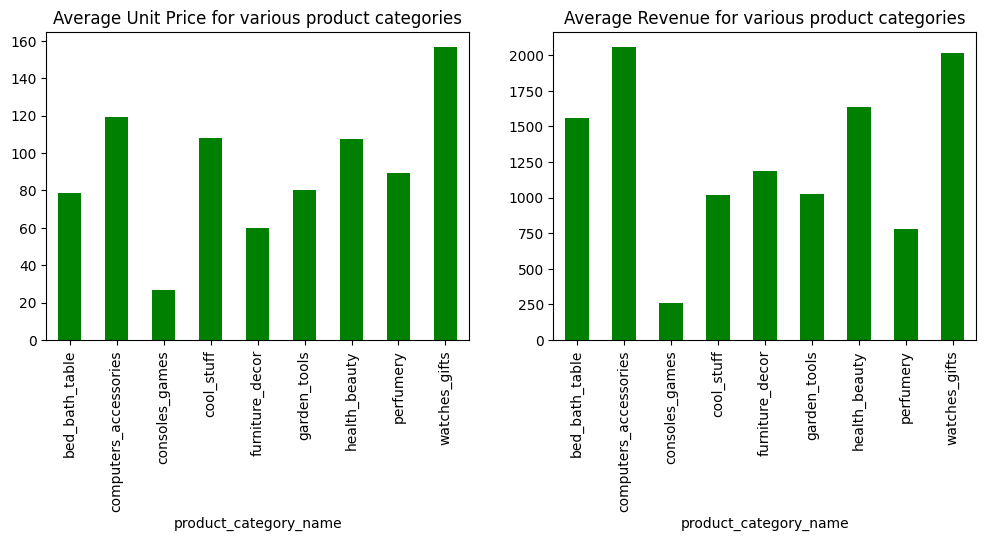

In [327]:
## plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
data.groupby('product_category_name')['unit_price'].mean().plot(kind = 'bar', color = 'g')
plt.title('Average Unit Price for various product categories')

plt.subplot(1, 2, 2)
data.groupby('product_category_name')['total_price'].mean().plot(kind = 'bar', color = 'g')
plt.title('Average Revenue for various product categories')

plt.show();

- We can see, some of the categories like bed_bath_table, computer accessories and furniture decor have lower unit price but have higher revenue, maybe the quantity bought are higher for these categories.
- And the reverse for some categories like perfumery that have higher unit price but lower revenue.
- watches and gift categories have higher unit price on average and also have relatively higher revenue

In [328]:
data.head(3).T

,0,1,2
product_id,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017
qty,1,3,6
total_price,45.95,137.85,275.7
freight_price,15.1,12.933333,14.84
unit_price,45.95,45.95,45.95
product_name_lenght,39,39,39
product_description_lenght,161,161,161
product_photos_qty,2,2,2


In [7]:
# seasonality and revenue relation
data[['total_price', 's']].corr()

,total_price,s
total_price,1.0000,0.3345
s,0.3345,1.0000


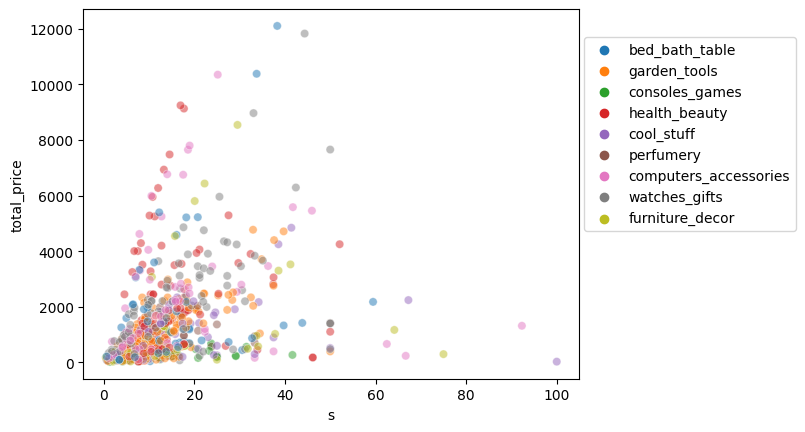

In [8]:
## also observed some positive correlatio between seasonality and revenue, based on different product categories

sns.scatterplot(data = data, x = 's', y = 'total_price', hue = 'product_category_name', alpha = 0.5)
plt.legend(loc = (1.01, 0.4))
plt.show();

- Overall can see a slight positive relation between revenue and seasonality and this seems to be across all product categories.
- also, it is only for few observations that we are seeing seasonality above 60. Most of the products have seasonality less than 60.
- Another observation, for seasonality values 20 upto around 50, we can see higher revenue as well but once reaches around 60, the revenue are very less. This behaviour can be specific to products. Lets check this out.

In [16]:
# higher seasonality and lower revenue
data[(data['s'] > 60) & (data['total_price'] < 4000)]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,total_cost,profit,profit_margin
151,computers5,computers_accessories,01-12-2017,2,239.80,13.440000,119.900000,33,300,1,...,119.900000,3.5,13.440000,109.9000,3.5,25.249167,119.85,26.88,212.92,88.790659
281,cool3,cool_stuff,01-09-2017,1,29.50,11.730000,29.500000,57,787,8,...,29.500000,4.4,11.730000,29.5000,4.4,11.730000,29.45,11.73,17.77,60.237288
282,cool3,cool_stuff,01-01-2018,76,2242.00,16.532632,29.500000,57,787,8,...,129.990000,4.3,17.410000,29.5000,4.4,16.532632,29.45,1256.48,985.52,43.957181
370,furniture4,furniture_decor,01-12-2017,3,299.70,20.646667,99.900000,57,272,1,...,99.900000,4.4,20.646667,99.9000,4.4,20.646667,99.90,61.94,237.76,79.332666
460,furniture3,furniture_decor,01-11-2017,34,1170.35,13.750588,34.581176,41,789,1,...,36.854286,3.7,13.652143,99.9000,4.4,21.190000,38.40,467.52,702.83,60.052976
621,computers3,computers_accessories,01-01-2018,5,665.00,38.044000,133.000000,42,363,1,...,150.354546,4.3,22.547727,97.6425,3.5,14.846552,134.90,190.22,474.78,71.395489
652,computers2,computers_accessories,01-12-2017,12,1318.80,25.249167,109.900000,33,256,1,...,109.900000,3.5,25.249167,109.9000,3.5,25.249167,109.90,302.99,1015.81,77.025326


In [18]:
# mid seasonality and higher revenue
data[(data['s'] > 20) & (data['s'] < 60) & (data['total_price'] > 6000)]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,total_cost,profit,profit_margin
175,computers6,computers_accessories,01-02-2018,69,10343.10,26.552899,149.900000,48,894,1,...,149.900000,4.3,26.552899,78.712281,3.5,14.535915,150.354546,1832.150000,8510.950000,82.286258
276,watches6,watches_gifts,01-04-2018,85,8961.49,2.181647,105.648625,33,523,3,...,105.000000,4.2,13.631429,150.133333,3.8,19.447778,117.441290,185.440000,8776.050000,97.930701
277,watches6,watches_gifts,01-05-2018,114,11820.20,0.095439,103.792523,33,523,3,...,105.000000,4.2,11.377297,132.531250,3.8,15.762187,105.648625,10.880000,11809.320000,99.907954
383,watches5,watches_gifts,01-12-2017,28,6287.20,17.486786,224.542857,42,236,1,...,108.000000,4.2,16.653846,185.960000,3.8,18.686000,203.290909,489.630000,5797.570000,92.212273
499,furniture2,furniture_decor,01-01-2018,122,8538.00,17.663115,69.995327,44,903,6,...,38.400000,3.7,9.340000,99.900000,4.4,22.819231,75.000000,2154.899999,6383.100001,74.761068
503,furniture2,furniture_decor,01-05-2018,92,6430.80,3.801630,69.900000,44,903,6,...,35.000000,3.7,14.634545,99.900000,4.4,19.410769,69.900000,349.750000,6081.050000,94.561330
612,watches7,watches_gifts,01-07-2018,45,7651.27,17.953556,169.349318,46,501,4,...,105.000000,4.2,24.938750,155.000000,3.8,16.470000,245.900000,807.910000,6843.360000,89.440838
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,205.000000,4.4,22.195932,45.950000,4.0,14.840000,209.000000,1309.560000,10785.440000,89.172716
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,199.509804,4.4,19.412885,45.950000,4.0,14.287500,205.000000,1009.470000,9365.530000,90.270169


In [143]:
# checking the volume feature
data.groupby('product_category_name')['volume'].mean()

product_category_name
bed_bath_table           13347.278689
computers_accessories     5026.782609
consoles_games            2304.000000
cool_stuff               18767.894737
furniture_decor          12770.833333
garden_tools             20007.650000
health_beauty             5181.976923
perfumery                 4026.500000
watches_gifts             3254.640777
Name: volume, dtype: float64

In [147]:
# volume with revenue and other features correlation
data[['total_price', 'volume', 'unit_price', 'qty']].corr()

,total_price,volume,unit_price,qty
total_price,1.000000,-0.088726,0.409001,0.749605
volume,-0.088726,1.000000,-0.197233,0.049827
unit_price,0.409001,-0.197233,1.000000,-0.103432
qty,0.749605,0.049827,-0.103432,1.000000


- As expected, we can see these are very specific to products. Even for same category, the nature of the products can be different and this might led to these results.
- Further, we will take up just a single product and analyze in detail.

In [19]:
# lets check the number of observations for each product category
data.groupby('product_category_name')['unit_price'].count()

product_category_name
bed_bath_table            61
computers_accessories     69
consoles_games            22
cool_stuff                57
furniture_decor           48
garden_tools             160
health_beauty            130
perfumery                 26
watches_gifts            103
Name: unit_price, dtype: int64

In [9]:
# lets get the data only for say bed_bath_table category and do some deeper analysis
# we haev 61 observations for this type
bed_bad = data[data['product_category_name']=='bed_bath_table']

In [21]:
# number of products
bed_bad.groupby('product_id')['unit_price'].count()

product_id
bed1    16
bed2    19
bed3    11
bed4    10
bed5     5
Name: unit_price, dtype: int64

In [22]:
# number of products and their average revenue
bed_bad.groupby('product_id')['total_price'].mean()

product_id
bed1     364.485625
bed2    2259.929474
bed3     936.814545
bed4     601.177000
bed5    5999.472000
Name: total_price, dtype: float64

In [24]:
# number of products and their average unit_price
bed_bad.groupby('product_id')['unit_price'].mean()

product_id
bed1     42.211989
bed2     86.774536
bed3     92.101364
bed4     46.725444
bed5    198.381703
Name: unit_price, dtype: float64

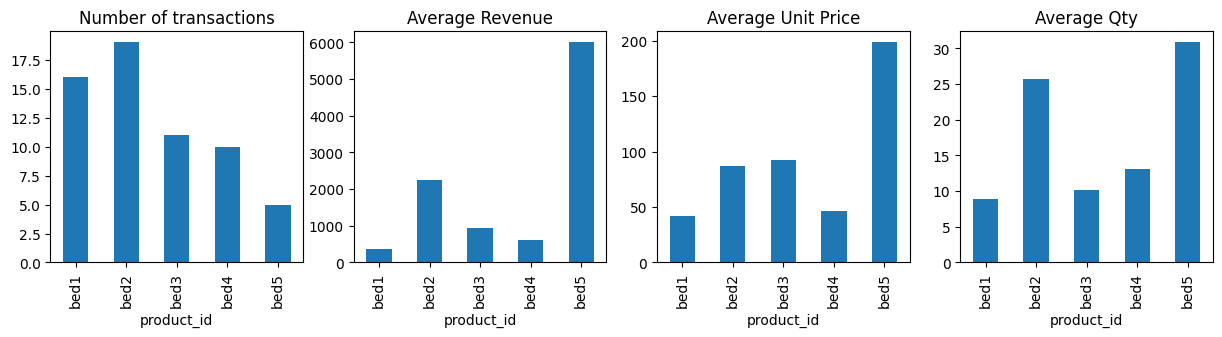

In [10]:
# plot 
plt.figure(figsize=(15, 3))

# number of products
plt.subplot(1,4,1)
bed_bad.groupby('product_id')['unit_price'].count().plot(kind = 'bar')
plt.title('Number of transactions')

plt.subplot(1,4,2)
bed_bad.groupby('product_id')['total_price'].mean().plot(kind='bar')
plt.title('Average Revenue')

plt.subplot(1,4,3)
bed_bad.groupby('product_id')['unit_price'].mean().plot(kind='bar')
plt.title('Average Unit Price')

plt.subplot(1,4,4)
bed_bad.groupby('product_id')['qty'].mean().plot(kind='bar')
plt.title('Average Qty')

plt.show();

- So, we can see here bed5 have the least number of transactions but generate highest revenue as it has highest unit price and bought in highest qty
- bed1 has second highest number of transactions but least revenue as it has least avg unit price and least avg qty
- So, we can check the nature of the product, may be we can check the product description, product size, weight, its overall value. etc

In [36]:
# lets check with other features as well

bed_bad.groupby('product_id').agg({'freight_price':'mean', 'product_weight_g':'mean', 
                                   'product_score':'mean', 'customers':'mean', 
                                   'weekday':'mean', 'weekend':'mean',
                                  'holiday':'mean', 'month':'mean', 's':'mean'})

,freight_price,product_weight_g,product_score,customers,weekday,weekend,holiday,month,s
product_id,,,,,,,,,
bed1,15.025673,350.0,4.0,57.187500,21.875000,8.625000,1.437500,6.500000,12.500000
bed2,17.063376,1383.0,3.9,50.947368,21.736842,8.631579,1.473684,5.947368,10.526316
bed3,15.665095,1550.0,3.3,48.181818,21.818182,8.636364,1.636364,6.272727,18.181818
bed4,15.157630,800.0,4.2,51.500000,21.700000,8.700000,1.700000,6.100000,20.000000
bed5,19.203101,9750.0,4.4,77.000000,22.000000,8.600000,1.000000,7.000000,20.000000


- Here, we can see the avg weight of bed 5 is the highest, so it must be a heavier and bigger item as compared to the rest. Eventually it has a higher freight price. And hence higher unit price and it is bought by many customers, so this can be a very necessity item like bed or a sofa or a wardrobe kind of item.
- Lets check again for the revenue generated for these products over time

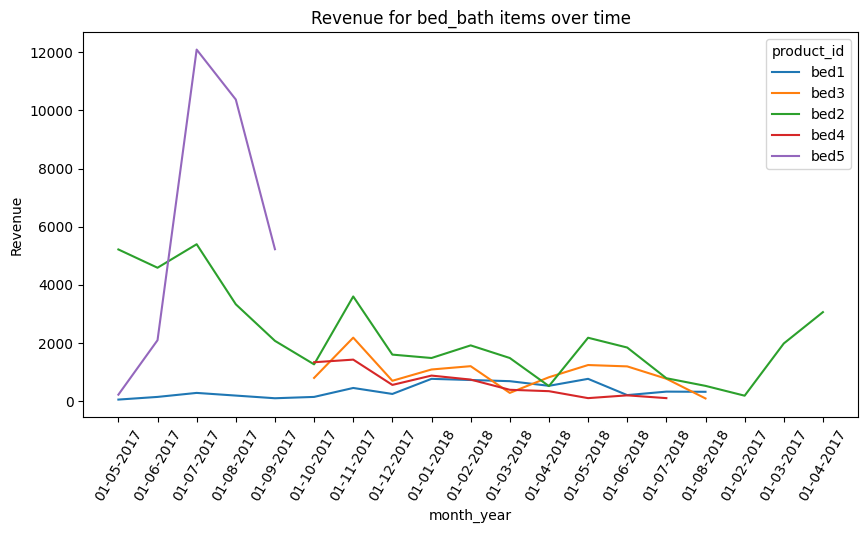

In [14]:
# revenue for each bed_bath item over time

plt.figure(figsize=(10, 5))
sns.lineplot(data=bed_bad, x = 'month_year', y = 'total_price', hue = 'product_id')
plt.xticks(rotation = 60)
plt.ylabel('Revenue')
plt.title('Revenue for bed_bath items over time')
plt.show();

- We can see very less time span for bed5, but generated very high revenue, exceptionally high revenue as compared to the rest. Company needs to check why there is very less transaction as this is contributing more revenue overall, and this product needs to survive.
- Rest of product type has some general trend overall.
- We have highest number of observations for product type bed2 and also it has seen some ups and down.
- lets just analyze this product data and see if we can generate some insights on optimal price for this product based on EDA, based on the revenue generated.

In [15]:
# get data for bed_2 only
bed_2 = bed_bad[bed_bad['product_id'] == 'bed2']
bed_2

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,total_cost,profit,profit_margin
438,bed2,bed_bath_table,01-02-2017,2,179.80,13.020000,89.900000,54,245,1,...,89.900000,3.9,13.020000,89.900000,3.9,13.020000,89.850000,26.04,153.76,85.517241
439,bed2,bed_bath_table,01-03-2017,22,1977.80,13.652727,89.900000,54,245,1,...,89.900000,3.9,13.652727,89.900000,3.9,13.652727,89.900000,300.36,1677.44,84.813429
440,bed2,bed_bath_table,01-04-2017,34,3056.60,15.050000,89.900000,54,245,1,...,89.900000,3.9,15.050000,89.900000,3.9,15.050000,89.900000,511.70,2544.90,83.259177
441,bed2,bed_bath_table,01-05-2017,58,5214.20,15.011897,89.900000,54,245,1,...,215.000000,4.4,8.760000,45.950000,4.0,15.100000,89.900000,870.69,4343.51,83.301561
442,bed2,bed_bath_table,01-06-2017,51,4584.90,14.769216,89.900000,54,245,1,...,209.000000,4.4,21.322000,45.950000,4.0,12.933333,89.900000,753.23,3831.67,83.571506
443,bed2,bed_bath_table,01-07-2017,60,5394.00,13.993833,89.900000,54,245,1,...,205.000000,4.4,22.195932,45.950000,4.0,14.840000,89.900000,839.63,4554.37,84.434001
444,bed2,bed_bath_table,01-08-2017,37,3326.30,14.656757,89.900000,54,245,1,...,199.509804,4.4,19.412885,45.950000,4.0,14.287500,89.900000,542.30,2784.00,83.696600
445,bed2,bed_bath_table,01-09-2017,23,2067.70,18.776522,89.900000,54,245,1,...,163.398710,4.4,24.324687,45.950000,4.0,15.100000,89.900000,431.86,1635.84,79.113991
446,bed2,bed_bath_table,01-10-2017,14,1258.60,21.572143,89.900000,54,245,1,...,89.900000,3.9,21.572143,45.950000,4.0,15.100000,89.900000,302.01,956.59,76.004290
447,bed2,bed_bath_table,01-11-2017,40,3596.00,16.294000,89.900000,54,245,1,...,89.900000,3.9,16.294000,40.531818,4.0,15.832727,89.900000,651.76,2944.24,81.875417


In [16]:
## adding average competitor price

bed_2['avg_comp'] = (bed_2['comp_1'] + bed_2['comp_2'] + bed_2['comp_3'])/3

In [6]:
## lets scale the data so that our analysis can be done on the same scale

from sklearn.preprocessing import MinMaxScaler

In [18]:
# scale data
scaler = MinMaxScaler()

# only for the numerical columns
t = scaler.fit_transform(bed_2[[col for col in bed_2 if bed_2[col].dtype != 'object']])
t = pd.DataFrame(data = t, columns=[col for col in bed_2 if bed_2[col].dtype != 'object'])

# add the month_year column
t['month_year'] = bed_2['month_year'].values
t.head(2)

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,fp2,comp_3,ps3,fp3,lag_price,total_cost,profit,profit_margin,avg_comp,month_year
0,0.000000,0.000000,0.007948,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.273696,1.0,0.0,0.271984,0.995822,0.000000,0.000000,1.000000,0.504003,01-02-2017
1,0.344828,0.344828,0.070808,1.0,0.0,0.0,0.0,0.0,0.0,0.14876,...,0.314348,1.0,0.0,0.334254,1.000000,0.324774,0.346243,0.950818,0.504003,01-03-2017


In [19]:
# get the max total_price point
bed_2[bed_2['total_price'] == bed_2['total_price'].max()]['month_year'].iloc[0]

'01-07-2017'

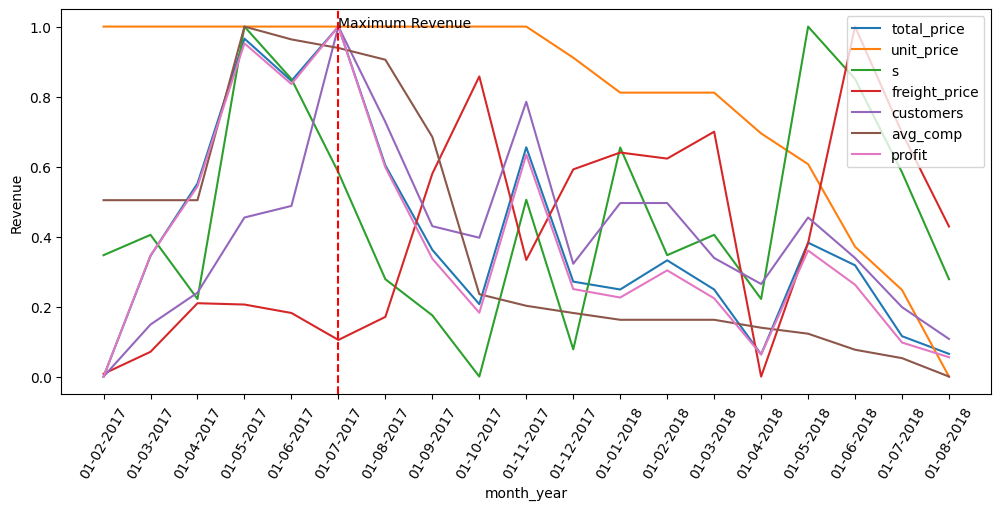

In [37]:
# plotting revenue, and other features trend across time
plt.figure(figsize = (12, 5))

# point with max revenue
x = bed_2[bed_2['total_price'] == bed_2['total_price'].max()]['month_year'].iloc[0]

# plot for various features and the revenue
sns.lineplot(data = t, x = 'month_year', y = 'total_price', label = 'total_price') 
sns.lineplot(data = t, x = 'month_year', y = 'unit_price', label = 'unit_price') 
sns.lineplot(data = t, x = 'month_year', y = 's', label = 's') 
sns.lineplot(data = t, x = 'month_year', y = 'freight_price', label = 'freight_price') 
# sns.lineplot(data = t, x = 'month_year', y = 'product_score', label = 'product_score') 
sns.lineplot(data = t, x = 'month_year', y = 'customers', label = 'customers') 
sns.lineplot(data = t, x = 'month_year', y = 'avg_comp', label = 'avg_comp') 
#sns.lineplot(data = t, x = 'month_year', y = 'comp_1', label = 'comp_1') 
#sns.lineplot(data = t, x = 'month_year', y = 'comp_2', label = 'comp_2') 
#sns.lineplot(data = t, x = 'month_year', y = 'comp_3', label = 'comp_3') # 
sns.lineplot(data = t, x = 'month_year', y = 'profit', label = 'profit') 
plt.xticks(rotation = 60)
plt.ylabel('Revenue')
plt.axvline(x = x, color = "red", linestyle = "dashed", )
plt.text(x, 1, "Maximum Revenue")
plt.show();

In [123]:
# observations with highest revenue for bed2 product
bed_2[bed_2['total_price'] == bed_2['total_price'].max()]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,total_cost,profit,profit_margin
443,bed2,bed_bath_table,01-07-2017,60,5394.0,13.993833,89.9,54,245,1,...,205.0,4.4,22.195932,45.95,4.0,14.84,89.9,839.63,4554.37,84.434001


### Findings
- **Based on the above plot for just the bed2 data, we can see the maximum revenue of 5394.0 with unit_price of 89.9**
- These revenue can be due to many other factors, as we know it is directly proportional to unit_price and quantity. And as it is totally influenced by the qty value and also by the customers.
- Also, we a lesser freight price value at this point, which is basically the cost incurred for this dataset. And also, we observe as the freight value increases, there is slight decrease in profit value.
- My insights here is, **recommending an optimal price for a specific product depends on the nature of the product and the combination of these relevant features, different features impacts the product revenue and this varies for different products. Besides, there are very less observation for each of the product type for this dataset, so the results can be very biased due to it.**
- Further, lets check into few more strategies that can help identify optimal price.

## Pricing Strategies:
- Below we will analyze 3 pricing strategies and try to find the optimal price for each product in general as mentioned below:
    - **Cost Plus Pricing**
    - **Competitor Pricing**
    - **Price Elasticity on Demand**
- Then we will select the strategy that best suits for this scenario and will try to generate the optimum price for few products using the selected strategy.

## Cost Plus Pricing/Markup Pricing
- **A cost-plus pricing strategy, or markup pricing strategy**, is a simple pricing method where a fixed percentage markup is added on top of the production cost for one unit of product (unit cost). This pricing strategy focuses on internal factors like production cost rather than external factors like consumer demand and competitor prices. Cost-plus pricing allows companies to sell their products or services for more than it costs them to produce or deliver. While costs can be a straightforward measurement, desired profit margins can differ from company to company. Cost-plus pricing and profit margins typically won't consider competitor pricing or market research.
- For this strategy analysis, lets us just consider one product say **'bed1'**

In [159]:
# for this strategy we will need only the freight price, which is basically the cost incurred 

## get data for only bed1
bed_data = data[data['product_id'] == 'bed1'][['month_year', 'unit_price','freight_price']]
bed_data.head(3)

,month_year,unit_price,freight_price
0,01-05-2017,45.95,15.100000
1,01-06-2017,45.95,12.933333
2,01-07-2017,45.95,14.840000


In [39]:
## lets create a function that captures the amount of markup that we wish to get as profit and then calculate the selling price 

def cost_plus_pricing(df, markup_val):
    df['selling_price'] = df['freight_price'] * ( 1 + markup_val)
    return df

In [40]:
# lets say we expect to get around 60% profit on each transaction, based on our cost incurred i.e. the freight price
temp_cp1 = cost_plus_pricing(bed_data, 0.6)
temp_cp1.head(5)

,month_year,unit_price,freight_price,selling_price
0,01-05-2017,45.95,15.100000,24.160000
1,01-06-2017,45.95,12.933333,20.693333
2,01-07-2017,45.95,14.840000,23.744000
3,01-08-2017,45.95,14.287500,22.860000
4,01-09-2017,45.95,15.100000,24.160000


In [41]:
# lets say we expect to get around 90% profit on each transaction, based on the freight price
temp_cp2 = cost_plus_pricing(bed_data, 0.9)
temp_cp2.head()

,month_year,unit_price,freight_price,selling_price
0,01-05-2017,45.95,15.100000,28.690000
1,01-06-2017,45.95,12.933333,24.573333
2,01-07-2017,45.95,14.840000,28.196000
3,01-08-2017,45.95,14.287500,27.146250
4,01-09-2017,45.95,15.100000,28.690000


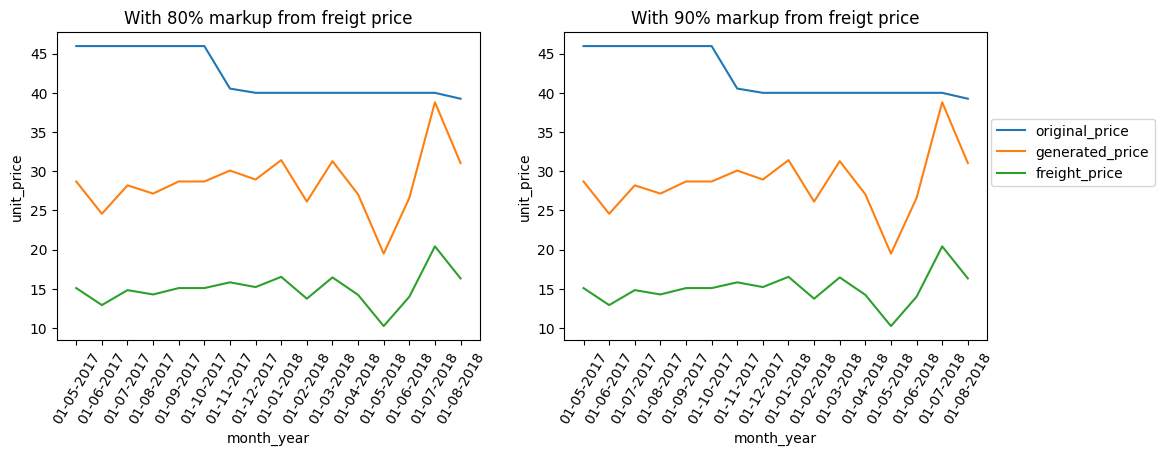

In [42]:
# plotting these generated prices with our unit prices across time

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(data = temp_cp1, x = 'month_year', y = 'unit_price') 
sns.lineplot(data = temp_cp1, x = 'month_year', y = 'selling_price')
sns.lineplot(data = temp_cp1, x = 'month_year', y = 'freight_price')
plt.title('With 80% markup from freigt price')
plt.xticks(rotation = 60)

plt.subplot(1, 2, 2)
sns.lineplot(data = temp_cp2, x = 'month_year', y = 'unit_price', label ='original_price')
sns.lineplot(data = temp_cp2, x = 'month_year', y = 'selling_price', label ='generated_price')
sns.lineplot(data = temp_cp2, x = 'month_year', y = 'freight_price', label ='freight_price')
plt.title('With 90% markup from freigt price')
plt.legend(loc = (1.01, 0.50))
plt.xticks(rotation = 60)

plt.show();

### Findings for this strategy
- We can see from above, that if there is any fluctuation on our cost amount, the selling price changes accordingly with the fixed profit marginal value.
#### Advantages and disadvantages for this strategy
- It is very simple to implement, reliable, easy to undertand and requires less research.
- Cost-plus pricing can be helpful if we have limited information surrounding customer expectations, competitor pricing or market demand. The only data needed for cost-plus pricing are the company's costs and desired profit margins.
#### Disadvantages for this strategy
- It doesn't always correlate to customer value. Understanding customer needs and expectations can be an important factor to consider when pricing a product and cost-plus pricing can sometimes overlook the customer component. Optimizing the pricing within an existing market can increase the demand for the company's product.
- Sometimes price can be set too high, which may impact our sales and on the other hand, it can be too low, which may impact our profit
- It doesnt take into account competitors price values.
- It can reduce efficiency, e.g. sometimes, suppliers may not reduce their expenses and eventually our selling price is impacted.

## Competitor Pricing Strategy
- We will try to simulate three strategies on this Competitor Pricing method
- **Pricing above the competition**: Offering products or services priced superior to your competitors. It is usually done when we feel the products or services we offer are a notch above our competitors.
- **Pricing on the same level**: Also known as price matching. We price our product similar to that of our competitors. But here, our primary focus should be on the added value our product has to offer even though our product and its features are the same as the competitors.
- **Pricing below the competition**: Pricing below competition shouldn't be a strategy, if at all, we would do so if our product is limited in terms of features and functionality. It can also be adopted when we want to provide a competitive price for our customers in order to grab their attention, increase sales and our brand value.

In [7]:
# lets take these below features to simulate this Competitor Pricing strategy
test_cols = ['product_id', 'qty','unit_price', 'total_price','freight_price','comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3','ps3', 'fp3', 'total_cost', 'profit', 'profit_margin']
data[test_cols].head(3)

,product_id,qty,unit_price,total_price,freight_price,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,total_cost,profit,profit_margin
0,bed1,1,45.95,45.95,15.100000,89.9,3.9,15.011897,215.0,4.4,8.760000,45.95,4.0,15.100000,15.10,30.85,67.138194
1,bed1,3,45.95,137.85,12.933333,89.9,3.9,14.769216,209.0,4.4,21.322000,45.95,4.0,12.933333,38.80,99.05,71.853464
2,bed1,6,45.95,275.70,14.840000,89.9,3.9,13.993833,205.0,4.4,22.195932,45.95,4.0,14.840000,89.04,186.66,67.704026


- To get the competitor prices, I will be using the average value of the three competitor prices **'comp_1', 'comp_2' and 'comp_3'**
- So, for **keeping the price on the same level, we will use this average price as our selling price**
- For above and below the competition price, we can use similar approach on how much markup we want to keep over and below the competition prices

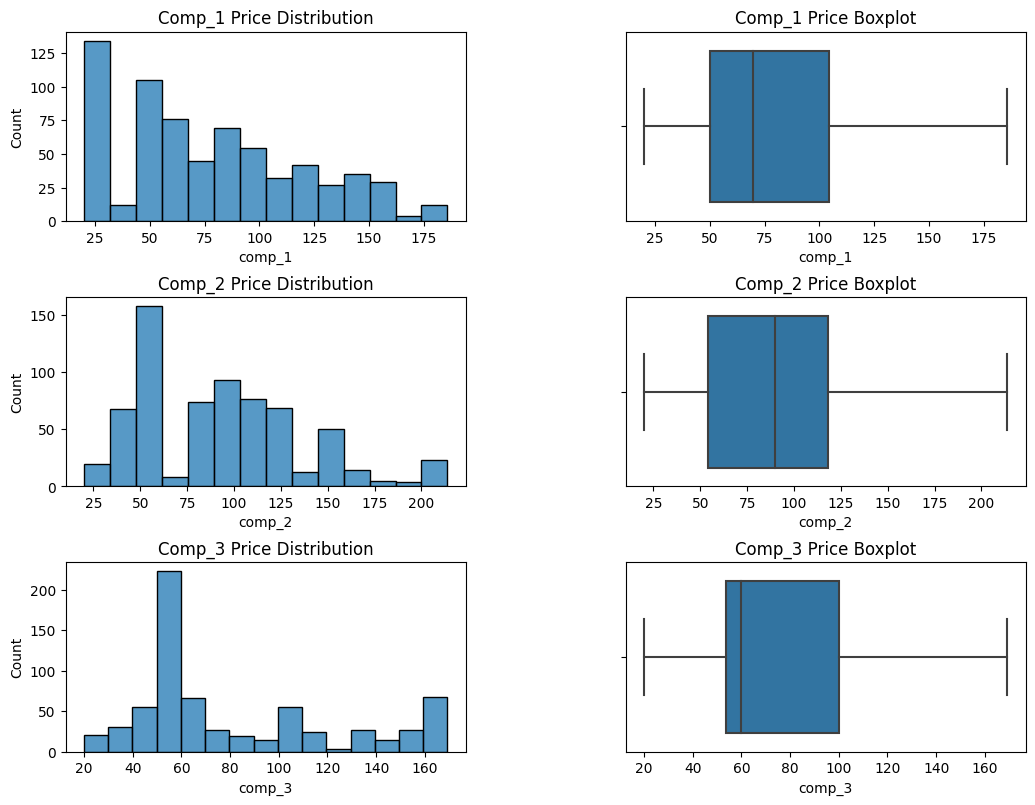

In [161]:
# distribution of the prices

plt.figure(figsize = (12, 9))

# adjusting the positions of the plots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(3, 2, 1)
sns.histplot(data = data, x = 'comp_1')
plt.title('Comp_1 Price Distribution')

plt.subplot(3, 2, 2)
sns.boxplot(data = data, x = 'comp_1')
plt.title('Comp_1 Price Boxplot')

plt.subplot(3, 2, 3)
sns.histplot(data = data, x = 'comp_2')
plt.title('Comp_2 Price Distribution')

plt.subplot(3, 2, 4)
sns.boxplot(data = data, x = 'comp_2')
plt.title('Comp_2 Price Boxplot')

plt.subplot(3, 2, 5)
sns.histplot(data = data, x = 'comp_3')
plt.title('Comp_3 Price Distribution')

plt.subplot(3, 2, 6)
sns.boxplot(data = data, x = 'comp_3')
plt.title('Comp_3 Price Boxplot')

plt.show();

- **Since the average price value will be used, outliers needs to be handled as they can impact the average value.**
- We can see some outliers in all the three competitors price ranges, we will need to handle these outliers.
- Lets use simple **IQR method to handle the outliers, capping method where we will replace the outlier values with the upper bound value, as we can see all the outlier values are on the upper side**
- **Also, we have observed, we have around 45 (around 6%) observations in the unit_price feature that are outliers on the higher side. So, we will also replace these outliers with the upper bound value.**

In [8]:
# lets write a function to replace the outlier values

def handle_price_outliers(df):
    for col_name in ['unit_price', 'comp_1', 'comp_2', 'comp_3']:
        # get the IQR value
        IQR = np.percentile(data[col_name], 75) - np.percentile(data[col_name], 25)
        
        # check for outliers
        upper_bound_value = (1.5 * IQR) + np.percentile(data[col_name], 75)
    
        # replace outlier values with upper bound value
        if df[col_name] > upper_bound_value:
            df[col_name] = upper_bound_value
    return df

In [9]:
# make a copy of the data 
data_copy = data.copy()

In [10]:
# replace the outlier values with the upper bound value in unit_price, comp_1, comp_2, comp_3
data = data.apply(handle_price_outliers, axis = 1)

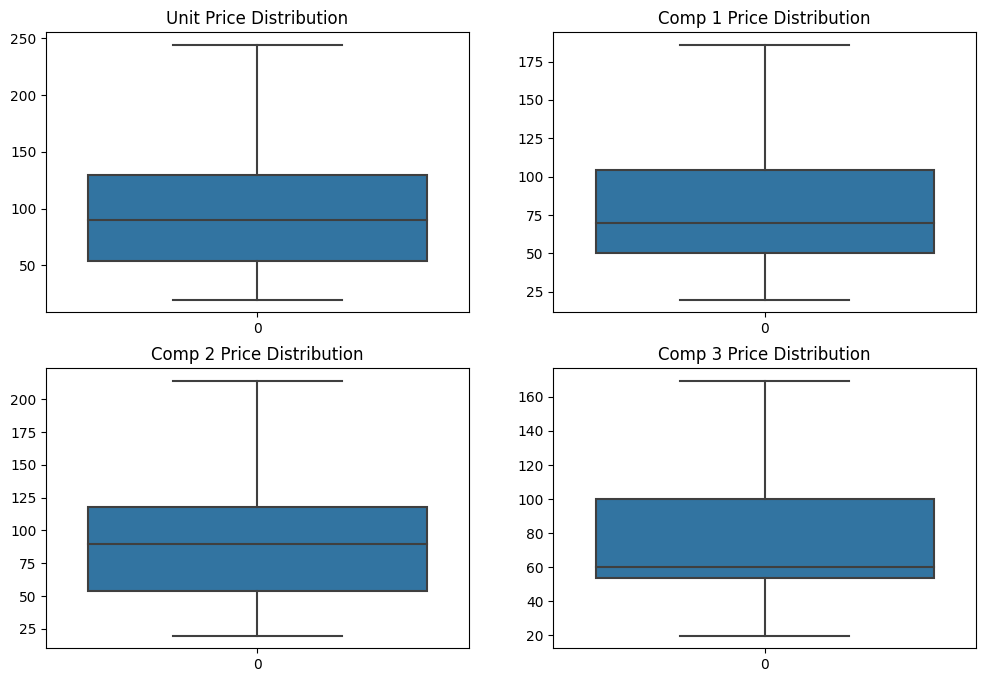

In [11]:
# check if the outliers are handled correctly
plt.figure(figsize= (12, 8))

plt.subplot(2,2, 1)
sns.boxplot(data['unit_price'])
plt.title('Unit Price Distribution')

plt.subplot(2,2, 2)
sns.boxplot(data['comp_1'])
plt.title('Comp 1 Price Distribution')

plt.subplot(2,2, 3)
sns.boxplot(data['comp_2'])
plt.title('Comp 2 Price Distribution')

plt.subplot(2,2, 4)
sns.boxplot(data['comp_3'])
plt.title('Comp 3 Price Distribution')
plt.show();

- Now before we get the average competitor;s price values, lets randomly check for some products how the prices varies over time

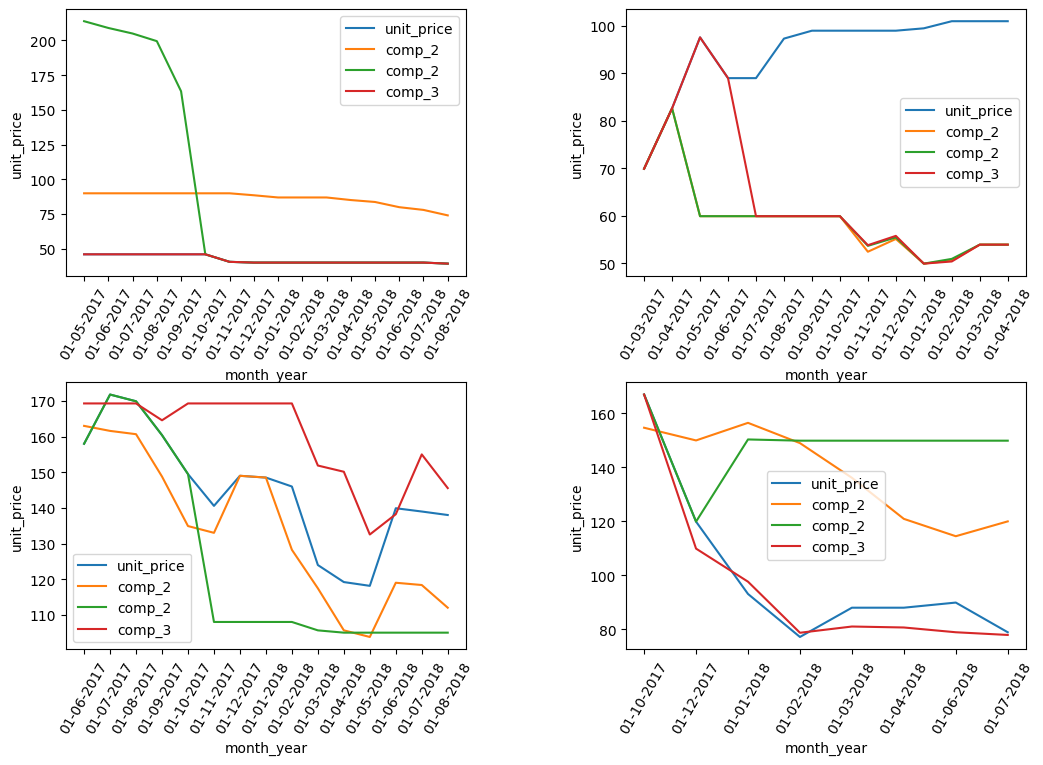

In [166]:
# plot price values for some products and see if the unit prices for the products are on in sync

plt.figure(figsize=(12, 8))

# adjusting the positions of the plots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# comparing price with the competitors over the course of time for bed1
plt.subplot(2, 2, 1) 
sns.lineplot(data = data[data['product_id'] == 'bed1'], x = 'month_year', y = 'unit_price', label = 'unit_price')
sns.lineplot(data = data[data['product_id'] == 'bed1'], x = 'month_year', y = 'comp_1', label = 'comp_2')
sns.lineplot(data = data[data['product_id'] == 'bed1'], x = 'month_year', y = 'comp_2', label = 'comp_2')
sns.lineplot(data = data[data['product_id'] == 'bed1'], x = 'month_year', y = 'comp_3', label = 'comp_3')
plt.xticks(rotation = 60)
plt.legend(loc = 'best')

# comparing price with the competitors over the course of time for garden5
plt.subplot(2, 2, 2) 
sns.lineplot(data = data[data['product_id'] == 'garden5'], x = 'month_year', y = 'unit_price', label = 'unit_price')
sns.lineplot(data = data[data['product_id'] == 'garden5'], x = 'month_year', y = 'comp_1', label = 'comp_2')
sns.lineplot(data = data[data['product_id'] == 'garden5'], x = 'month_year', y = 'comp_2', label = 'comp_2')
sns.lineplot(data = data[data['product_id'] == 'garden5'], x = 'month_year', y = 'comp_3', label = 'comp_3')
plt.xticks(rotation = 60)
plt.legend(loc = 'best')

# comparing price with the competitors over the course of time for watches2
plt.subplot(2, 2, 3) 
sns.lineplot(data = data[data['product_id'] == 'watches2'], x = 'month_year', y = 'unit_price', label = 'unit_price')
sns.lineplot(data = data[data['product_id'] == 'watches2'], x = 'month_year', y = 'comp_1', label = 'comp_2')
sns.lineplot(data = data[data['product_id'] == 'watches2'], x = 'month_year', y = 'comp_2', label = 'comp_2')
sns.lineplot(data = data[data['product_id'] == 'watches2'], x = 'month_year', y = 'comp_3', label = 'comp_3')
plt.xticks(rotation = 60)
plt.legend(loc = 'best')

# comparing price with the competitors over the course of time for computers5
plt.subplot(2, 2, 4) 
sns.lineplot(data = data[data['product_id'] == 'computers5'], x = 'month_year', y = 'unit_price', label = 'unit_price')
sns.lineplot(data = data[data['product_id'] == 'computers5'], x = 'month_year', y = 'comp_1', label = 'comp_2')
sns.lineplot(data = data[data['product_id'] == 'computers5'], x = 'month_year', y = 'comp_2', label = 'comp_2')
sns.lineplot(data = data[data['product_id'] == 'computers5'], x = 'month_year', y = 'comp_3', label = 'comp_3')
plt.xticks(rotation = 60)
plt.legend(loc = 'best')

plt.show();

- As **we can see our product unit price and competitor for some product are aligned with another but for many of the cases, they are varying.**
- So, sometimes, we may be selling at a lower price that may have impact our profit margin and sometimes we may be selling at a higer price, that may have impacted our sales. But this might totally depend on the value of the product we are offering and the competitors are offering.
- Now lets get the average price of our competitors and set our unit price accordingly.

In [12]:
# lets use the below features to get the price based on competitors

comp_features = ['product_id', 'unit_price', 'comp_1', 'comp_2', 'comp_3']

# create a temp data with just these features
comp_data = data[comp_features]
comp_data.head(2)

,product_id,unit_price,comp_1,comp_2,comp_3
0,bed1,45.95,89.9,213.872222,45.95
1,bed1,45.95,89.9,209.000000,45.95


In [13]:
# now lets create a feature, the total sum of all the competitors price and divide by 3
comp_data['comp_avg'] = (comp_data['comp_1'] + comp_data['comp_2'] + comp_data['comp_3'])/3
comp_data.head(3)

,product_id,unit_price,comp_1,comp_2,comp_3,comp_avg
0,bed1,45.95,89.9,213.872222,45.95,116.574074
1,bed1,45.95,89.9,209.000000,45.95,114.950000
2,bed1,45.95,89.9,205.000000,45.95,113.616667


In [169]:
# now lets get the average price of the these averages
comp_data = comp_data.groupby(['product_id']).agg({'unit_price':'mean', 'comp_avg':'mean'})
comp_data.sample()

,unit_price,comp_avg
product_id,,
watches5,213.89716,145.713313


In [15]:
t = comp_data.copy()
# comp_data = t.copy()

In [16]:
# now lets set for some percentage higher or lower than the average competitors price

# assuming we want 30% above 
comp_data['30%_above_avg'] = comp_data['comp_avg'] * 1.3

# assuming we want 10% below
comp_data['10%_below_avg'] = comp_data['comp_avg'] - (comp_data['comp_avg'] * 0.1) 

In [17]:
# lets check the price for some products
temp = comp_data.sample(3).reset_index()
temp

,index,product_id,unit_price,comp_1,comp_2,comp_3,comp_avg,30%_above_avg,10%_below_avg
0,294,perfumery2,117.888889,56.99,117.888889,117.888889,97.589259,126.866037,87.830333
1,253,garden9,59.900000,59.90,59.900000,59.900000,59.900000,77.870000,53.910000
2,151,computers5,119.900000,149.99,119.900000,109.900000,126.596667,164.575667,113.937000


In [21]:
# temp.head(2)
d = temp[['product_id','unit_price','comp_avg', '30%_above_avg', '10%_below_avg']]

<Figure size 800x400 with 0 Axes>

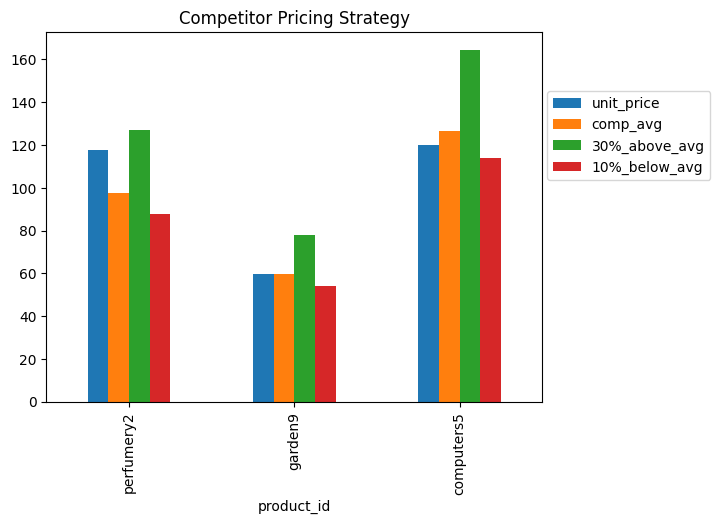

In [22]:
# plot the different prizes
plt.figure(figsize=(8, 4))
d.set_index('product_id').plot(kind='bar')
plt.title('Competitor Pricing Strategy')
plt.legend(loc = (1.01, 0.6))
plt.show();

<Figure size 800x400 with 0 Axes>

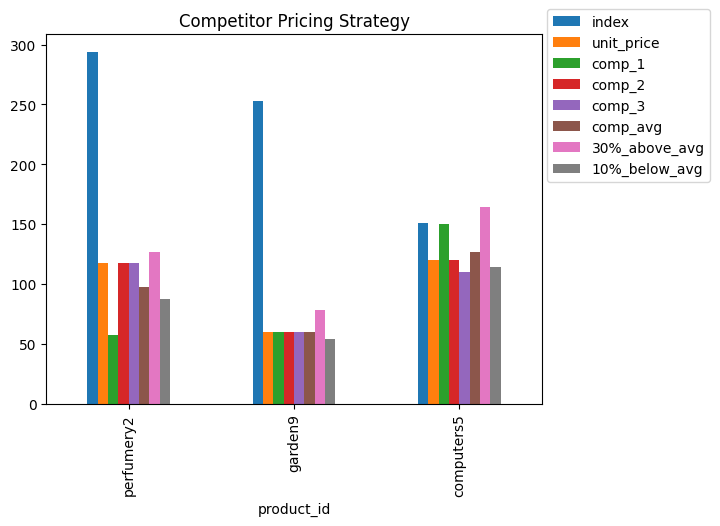

In [18]:
# plot the different prizes
plt.figure(figsize=(8, 4))
temp.set_index('product_id').plot(kind='bar')
plt.title('Competitor Pricing Strategy')
plt.legend(loc = (1.01, 0.6))
plt.show();

### Findings for this strategy
- This again, doesnt seem to be a perfect strategy to set the optimial price for all products, as the prices for the competitor's variability is high for some of the  product.
- This may be because, the value offerings for these competitors may vary and they may have set their price accordingly and this may not be the same with our product value in the market.
- There can be product which we offer higher value and accordingly we can set them at higher price, and vice versa. So, there is always a chance that we may miss our profit due to lower price offerings and also may have lost sales due to higher price.
- So, Using alone the competitors price to set out optimal price is not enough, we may have to consider other factors like our product value, our offerings, product score, and other relevant factors.

### Price Elasticity Demand
- For this, first lets just analyze how the qty is impacted based on the price.
- **PED shows how demand for a particular product changes when the price of the product is changed. It measures the percentage change in demand of a product when the price changes by 1%. It can be expressed as the following formula:**
	**PED = %change in quantity / % change in Price**
- E.g. for a product A, **if the demand for it decreases by 2% if the Price increased by 1%, then PED = -2%/1% = -2**

- **PED> 1 shows high elastic product. The change in price will cause a more than proportionate change in the demand. generally with non-essesntial or luxury products.** 
- **PED< 1 shows less elastic product, such as groceries and daily necessities.**

- **For most product, PED is negative i.e. when price is increased demand falls.**

- **Some insights on PED:**
	- PED for a given product can change overtime and hence it is imperative to  measure PED over time.
	- PED can vary by customer segments.  E.g. low income customers have higher PED for the same product. 
	- Pricing of a product should be optimized taking into account the PED. e.g. if a product is showing lower price elasticity, price can be increase on the product to maximize revenue.
	
- Here dependent parameter is **the quantity and Price is the independent variable**. Because, we are going to try different price ranges and see how the demand changes and will try to select the price with the highest demand, and that will be our **optimal price value**.

In [144]:
# lets first try to simulate the PED model with just the price and the quantity using just one product_id for simulation say garden1
# data.groupby('product_id')['month_year'].count()
garden = data[data['product_id'] == 'garden1']

In [132]:
# len of garden data
len(garden)

18

- We can see there are only 18 observations of this product_id, which is very less.. but still we'll continue with our analysis.
- First lets check how the relationship is between unit_price and quantity for this data

In [77]:
garden[['unit_price', 'qty']].describe()

,unit_price,qty
count,18.000000,18.000000
mean,105.764478,8.222222
std,11.381414,7.945073
min,89.990000,1.000000
25%,98.740000,4.250000
50%,106.245000,6.000000
75%,110.000000,7.000000
max,127.727273,28.000000


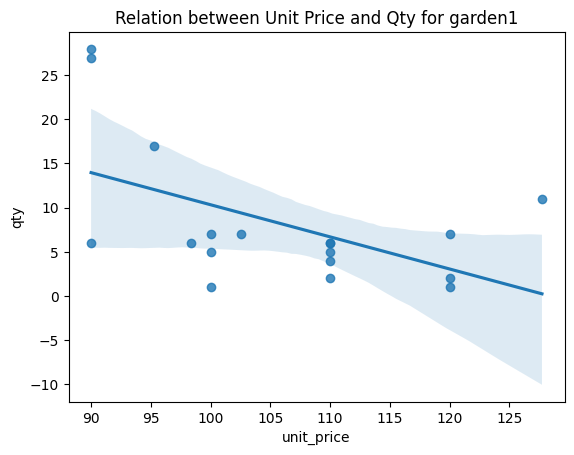

In [79]:
# plot the reg plot
sns.regplot(data = garden, x = 'unit_price', y = 'qty')
plt.title('Relation between Unit Price and Qty for garden1')
plt.show();

In [135]:
# check the correlation 
garden[['unit_price', 'qty']].corr()

,unit_price,qty
unit_price,1.000000,-0.521461
qty,-0.521461,1.000000


- we can see some negative correlation between the two features. **A unit increase in unit_price value can lead to 0.5 decrease in qty or vice versa.**
- So for this product, the PED seems to be negative, in the sense if price increases demand decrease and vice versa, but lets further analyze to quantify.

In [80]:
# now lets use a simple ols regression model to predict the qty based on the unit price

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [145]:
# build a simple ordinary least square regression model to predict the qty based on the price
# using the log data, as it has better capture non-linearity

lm = smf.ols('np.log(qty) ~ np.log(unit_price)', data = garden).fit() 

In [83]:
# results of the log-log linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(qty)   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     4.536
Date:                Sat, 03 Feb 2024   Prob (F-statistic):             0.0491
Time:                        01:23:08   Log-Likelihood:                -21.723
No. Observations:                  18   AIC:                             47.45
Df Residuals:                      16   BIC:                             49.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.9548      9.036      2.319      0.034       1.799      40.111
np.log(unit_price)    -4.1326      1.940     -2.130      0.049      -8.246      -0.019
==============================================================================
Omnibus:                        1.166   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.466
Skew:                          -0.394   Prob(JB):                        0.792
Kurtosis:                       3.036   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- the **R-square value is only .221 indicating the variability of the qty is not very much explained by the unit_price factor**
- so, we will need other factors to understand the variability of the demand
- But still we have the **p-value w.r.t our predictor variable unit_price to be 0.049 (< 0.05), so we can say still significant.**

In [81]:
## lets now used this ols model to predict qty based on different prices values 

garden['unit_price'].min(), garden['unit_price'].max()

(89.99, 127.7272727)

In [146]:
# set up df to store results
test_results = pd.DataFrame(columns = ['unit_price', 'qty'])

In [147]:
# set up the price values
test_results['unit_price'] = np.log(np.arange(87, 130, 2))

In [148]:
# get predictions
test_results['qty'] = lm.predict(test_results['unit_price'])

In [87]:
# check the test_results
test_results

,unit_price,qty
0,4.465908,14.770455
1,4.488636,14.749476
2,4.510860,14.729066
3,4.532599,14.709197
4,4.553877,14.689842
5,4.574711,14.670978
6,4.595120,14.652583
7,4.615121,14.634634
8,4.634729,14.617113
9,4.653960,14.600000


In [149]:
# get the max_qty value
test_results[test_results['qty'] == test_results['qty'].max()]

,unit_price,qty
0,4.465908,14.770455


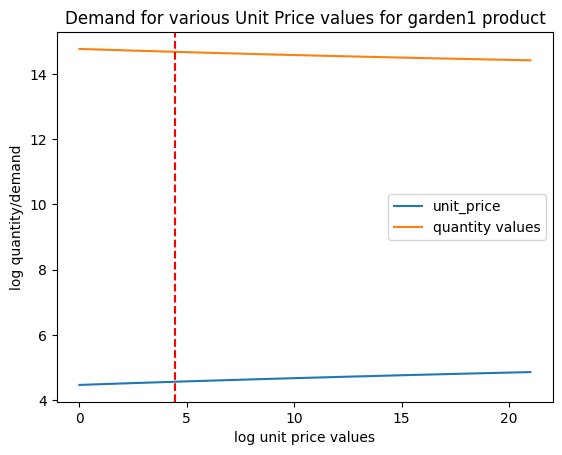

In [152]:
# plot the results

# get the unit_price where maximum qty value is seen
x = test_results[test_results['qty'] == test_results['qty'].max()]['unit_price'][0]

sns.lineplot(data = test_results, x = test_results.index, y = 'unit_price', label='unit_price')
sns.lineplot(data = test_results, x = test_results.index, y = 'qty', label='quantity values')
plt.xlabel('log unit price values')
plt.ylabel('log quantity/demand')
plt.axvline(x = x, linestyle = 'dashed', color = 'r')
plt.title('Demand for various Unit Price values for garden1 product')
plt.show();

In [107]:
# get the unit price value
np.exp(4.465908)

86.99998967705181

- This is **basically the lowest price value that we have set in our price range**
- since we have very less data points, doing a simple uni-variate regression is not an optimal approach here to get the optimal price value
- Now, lets try to add other features and analyze the unit price based on impact on the demand and the profit
- For this lets try using a more advanced regressor model to predict the revenue based on multiple features and will try to find the optimal price value.

#### lets first do a simulation with our bed2data
- We will try to find the features that have some co-relation say atleast an absolute value of 0.3
- then we will use these features to predict the total revenue ( in our case, given by total_price)
- once we have the model, we will then use the model to test a range of unit price values and find the one with the maximum profit, (keeping other feature values constant so that we can see the variability in the profit w.r.t unit_price)

In [112]:
# get data for garden1
garden = data[data['product_id'] == 'garden1']

In [153]:
# cols to consider
cols_test = ['qty',
 'total_price',
 'freight_price',
 'unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_score',
 'customers',
'weekday',
 'weekend',
 'holiday',
 'month',
 'year',
 's',
 'volume',
 'comp_1',
 'ps1',
 'fp1',
 'comp_2',
 'ps2',
 'fp2',
 'comp_3',
 'ps3',
 'fp3',
 'lag_price',
 'total_cost']

# create sample df
sample_df = garden[cols_test]

In [154]:
# create a feature to generate avg of the competitor price values

sample_df['comp_avg'] = (sample_df['comp_1'] + sample_df['comp_2'] + sample_df['comp_3'])/3

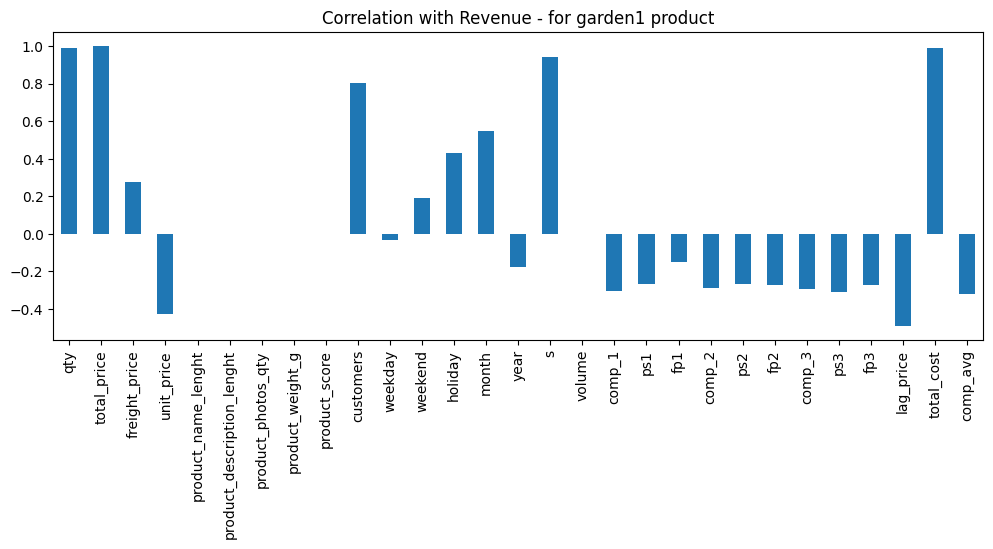

In [155]:
# now check the correlation
plt.figure(figsize=(12, 4))
plt.title('Correlation with Revenue - for garden1 product')
sample_df.corr()['total_price'].plot(kind = 'bar')
plt.show();

In [117]:
# get the features where the  correaltion values  >0.3
s = np.abs(sample_df.corr()['total_price'])>0.3

In [118]:
# get the features with absolute corr > 0.3
s.index[s].tolist()

['qty',
 'total_price',
 'unit_price',
 'customers',
 'holiday',
 'month',
 's',
 'comp_1',
 'ps3',
 'lag_price',
 'total_cost',
 'comp_avg']

In [119]:
# now get the data
sample_df = sample_df[s.index[s].tolist()]
sample_df.head(2)

,qty,total_price,unit_price,customers,holiday,month,s,comp_1,ps3,lag_price,total_cost,comp_avg
550,1,99.99,99.99,3,2,2,7.510204,99.99,4.3,99.94,28.89,99.99
551,5,499.95,99.99,21,1,3,8.551020,99.99,4.3,99.99,159.73,99.99


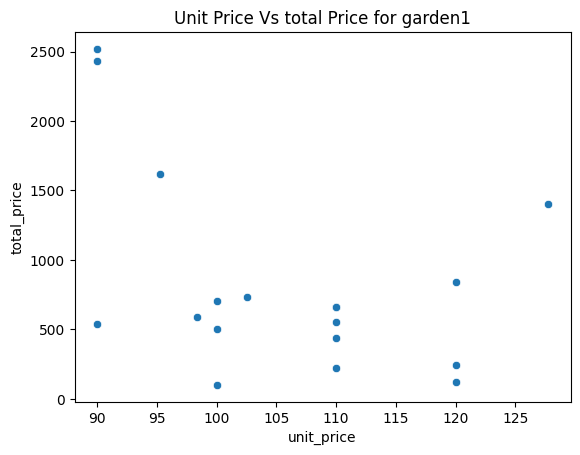

In [120]:
# check for co-relation before we fit the data
sns.scatterplot(x=bed2_data['unit_price'], y = bed2_data['total_price'])
plt.title('Unit Price Vs total Price for garden1')
plt.show();

In [121]:
# now we can create our ML model using these feature values
# we will use a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [122]:
# set the predictor and target variables
X, y = sample_df.drop(['total_price'], axis=1), sample_df['total_price']

In [123]:
# fit and train the model
model = RandomForestRegressor(n_estimators=15, random_state=40)
model.fit(X, y)
y_pred = model.predict(X)

In [124]:
# evaluate the model
print(f"R2 score: {r2_score(y, y_pred)}")

R2 score: 0.9794971819044208


In [125]:
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")

Mean Absolute Error: 55.66551851851844


In [126]:
# to get a sense of the mean absolute error value, lets check the avg profit value
sample_df['total_price'].mean()

826.0572222222222

- so, it is like **56/826 = 6.7% error value on average**

In [127]:
## now lets get the average values of all the features
# these values will be used when use to predict the profit amount with different unit prices
for col in ['qty', 'unit_price', 'customers', 'holiday','month','s','comp_1','ps3','lag_price','total_cost','comp_avg']:
    print('avg value of {}: {}'.format(col, round(sample_df[col].mean(), 2)))

avg value of qty: 8.22
avg value of unit_price: 105.76
avg value of customers: 102.17
avg value of holiday: 1.44
avg value of month: 6.06
avg value of s: 11.11
avg value of comp_1: 59.9
avg value of ps3: 4.14
avg value of lag_price: 106.41
avg value of total_cost: 328.35
avg value of comp_avg: 61.83


In [128]:
# get the unit_price range
sample_df['unit_price'].min(), sample_df['unit_price'].max()

(89.99, 127.7272727)

In [129]:
# set up df to store results
test_results = pd.DataFrame(columns = ['unit_price', 'revenue'])

In [130]:
# set up the price values
test_results['unit_price'] = np.arange(87, 130, 1)

In [131]:
# get predictions and store them in a list
results = []
for price in np.arange(87, 130, 1):
    
    # varying the unit price value only and keeping other feature values constant and get the prediction for revenue
    test_values = [[8.22, price, 102.17, 1.44, 6.06, 11.11, 59.9, 4.14, 106.41, 328.35, 61.83]]
    results.append(model.predict(test_values)[0])
results
test_results['revenue'] = results

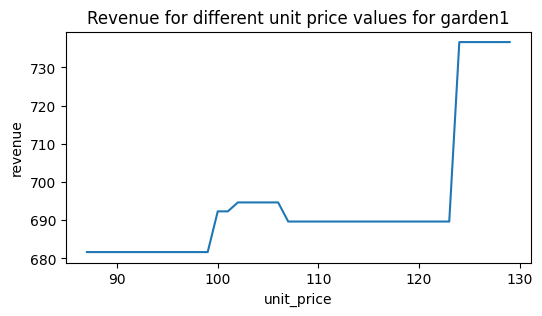

In [132]:
# plotting the unit price and profit
plt.figure(figsize=(6, 3))
sns.lineplot(data=test_results, x = 'unit_price', y = 'revenue')
plt.title('Revenue for different unit price values for garden1')
plt.show();

In [133]:
test_results[test_results['revenue'] >730]

,unit_price,revenue
37,124,736.640667
38,125,736.640667
39,126,736.640667
40,127,736.640667
41,128,736.640667
42,129,736.640667


- it seems from the above plot and tests, **if the unit price is greater than 124 for product garden1 then we get the maximum revenue keeping other features constant like 'qty', 'customers', 'holiday','month','s','comp_1','ps3','lag_price','total_cost','comp_avg' that was used as part of the model.**

- We can use this approach for other products as well
- But since there are very less observations for all the products, we will select only those products that has some higher number of observations

In [134]:
## lets write a function to perform this

def get_optimal_price(df, product_id):
    
    # create sample df
    sample_df = df[cols_test]
    
    
    # create a feature to generate avg of the competitor price values
    sample_df['comp_avg'] = (sample_df['comp_1'] + sample_df['comp_2'] + sample_df['comp_3'])/3
    
    # now check the correlation
    plt.figure(figsize=(12, 4))
    sample_df.corr()['total_price'].plot(kind = 'bar')
    plt.xlabel('Features')
    plt.ylabel('Correlation values')
    plt.title('Features correlation values with revenue for {}'.format(product_id))
    
    # get the features where the  correaltion values  >0.3
    s = np.abs(sample_df.corr()['total_price'])>0.3

    # get columns
    cols_to_use = s.index[s].tolist()
    
    # now get the data
    sample_df = sample_df[cols_to_use]
    
    # set the predictor and target variables
    X, y = sample_df.drop(['total_price'], axis=1), sample_df['total_price']
    
    # fit and train the model
    model = RandomForestRegressor(n_estimators=15, random_state=40)
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # evaluate the model
    print(f"R2 score: {r2_score(y, y_pred)}")
    
    print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")
    
    # to get a sense of the mean absolute error value, lets check the avg profit value
    mean_val = sample_df['total_price'].mean()
    print('Average total price: {}'.format(mean_val))
    
    ratio_check = (mean_absolute_error(y, y_pred)/mean_val) * 100
    print('It is like {}% error on average'.format(round(ratio_check, 2)))

    # remove total_price from the list to set up for prediction
    cols_to_use = [col for col in cols_to_use if col != 'total_price']
    print(cols_to_use)
    
    # get the avg values of the rest of the features
    avg_values = [round(sample_df[col].mean(), 2) if col != 'unit_price' else 'unit_price' for col in cols_to_use ]
    print(avg_values)

    # get the unit_price ranges
    min_val = sample_df['unit_price'].min()
    max_val = sample_df['unit_price'].max()
    
    # set up df to store results
    test_results = pd.DataFrame(columns = ['unit_price', 'revenue'])
    
    # set up the price values
    test_results['unit_price'] = np.arange(min_val, max_val, 1)
    
    # get predictions and store them in a list
    results = []
    for price in np.arange(min_val, max_val, 1):
        # varying the unit price value only and keeping other feature values constant and get the prediction for revenue
        test_values = [value if value != 'unit_price' else price for value in avg_values]
        results.append(model.predict([test_values])[0])

    # assign the results to revenue column in our test results df
    test_results['revenue'] = results

    # print the test results
    print(test_results)
    
    # plotting the unit price and revenue
    plt.figure(figsize=(6, 3))
    sns.lineplot(data=test_results, x = 'unit_price', y = 'revenue')
    plt.title('Revenue for different unit price values for {}'.format(product_id))
    plt.show();   

    return test_results

- lets check for **bed2, watches1** and **furniture2 data**

R2 score: 0.9831745489616114
Mean Absolute Error: 146.7640701754386
Average total price: 2259.9294736842107
It is like 6.49% error on average
['qty', 'freight_price', 'unit_price', 'customers', 'year', 's', 'comp_1', 'fp1', 'comp_2', 'ps2', 'lag_price', 'total_cost', 'comp_avg']
[25.63, 17.06, 'unit_price', 50.95, 2017.42, 10.53, 86.77, 17.06, 115.26, 4.03, 87.61, 422.37, 83.93]
    unit_price      revenue
0         74.0  1990.278000
1         75.0  1990.278000
2         76.0  1990.278000
3         77.0  1990.278000
4         78.0  1990.278000
5         79.0  1990.278000
6         80.0  1990.278000
7         81.0  1990.278000
8         82.0  1990.278000
9         83.0  1990.278000
10        84.0  1995.218000
11        85.0  1995.218000
12        86.0  1948.712000
13        87.0  1935.572667
14        88.0  1935.572667
15        89.0  1935.572667


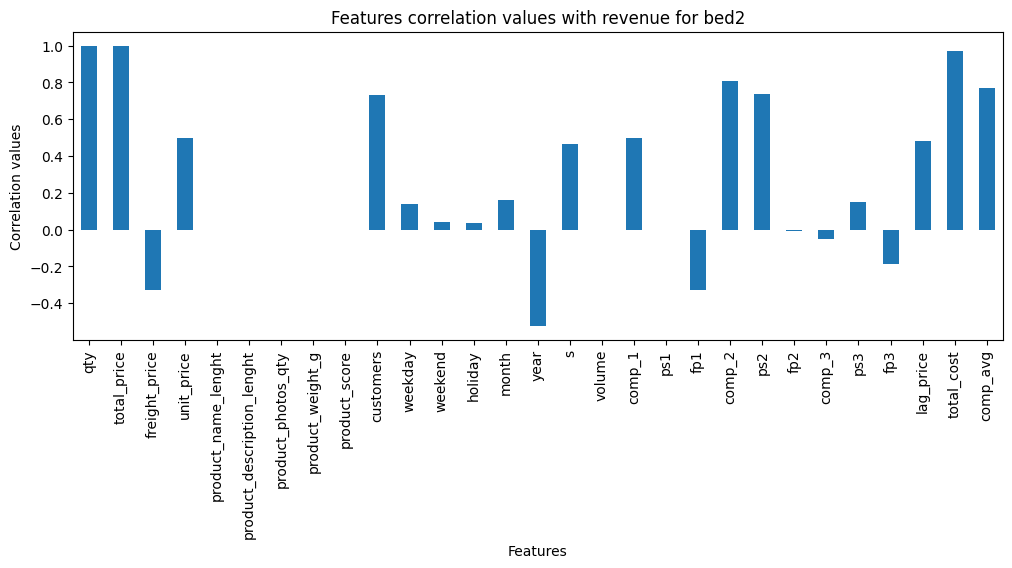

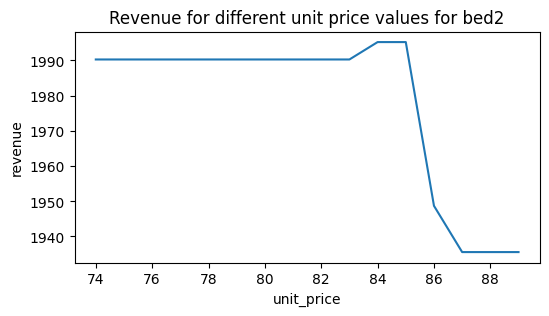

In [136]:
# create bed2 data
bed2_data = data[data['product_id'] == 'bed2']

# call the function
test_results = get_optimal_price(bed2_data, 'bed2')

In [140]:
# get the optimal price for bed2
test_results[test_results['revenue'] == test_results['revenue'].max()]

,unit_price,revenue
10,84.0,1995.218
11,85.0,1995.218


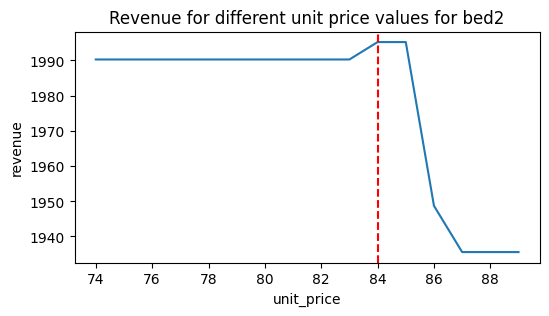

In [142]:
# plotting the unit price and revenue

plt.figure(figsize=(6, 3))
sns.lineplot(data=test_results, x = 'unit_price', y = 'revenue')
plt.title('Revenue for different unit price values for {}'.format('bed2'))
plt.axvline(x= 84.0, linestyle = 'dashed', color = 'r')
plt.show(); 

#### So, whenever the unit_price for bed2 is 84.0, the revenue is max given other feature values constant. So, optimal price for bed2 can be 84.0 as per this findings.
- Similarly lets try to find for couple other products as well

R2 score: 0.9702487157745247
Mean Absolute Error: 163.97486274509794
Average total price: 1869.8129411764705
It is like 8.77% error on average
['qty', 'unit_price', 'customers', 's', 'comp_1', 'ps1', 'comp_3', 'total_cost', 'comp_avg']
[11.41, 'unit_price', 79.53, 11.76, 141.93, 4.13, 160.64, 209.25, 148.52]
     unit_price      revenue
0     132.53125  2010.840000
1     133.53125  2010.840000
2     134.53125  2010.840000
3     135.53125  2010.840000
4     136.53125  2010.840000
..          ...          ...
107   239.53125  1906.259333
108   240.53125  1906.259333
109   241.53125  1906.259333
110   242.53125  1906.259333
111   243.53125  1906.259333

[112 rows x 2 columns]


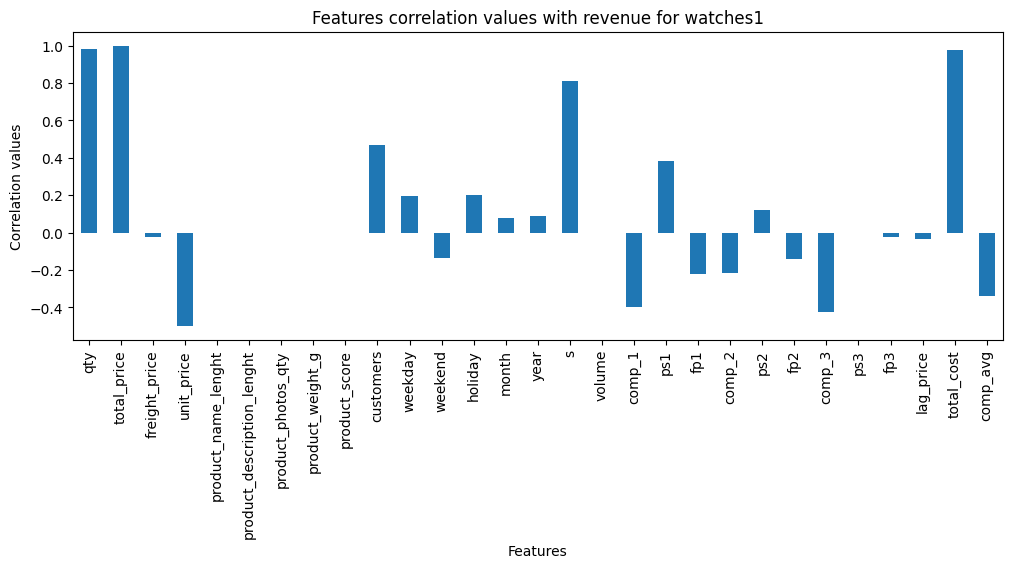

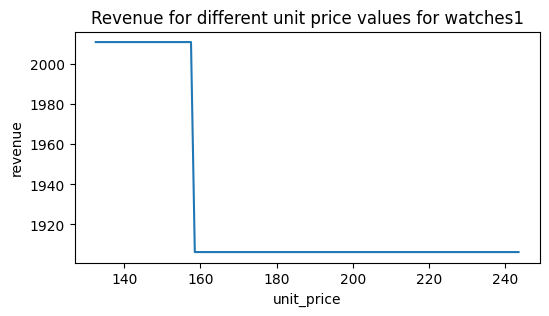

In [301]:
# create watches1 data
health_data = data[data['product_id'] == 'watches1']

# call the function
test_results = get_optimal_price(health_data, 'watches1')

In [300]:
# get the optimal price for watches1
test_results[test_results['revenue'] > 2000].min()

unit_price     132.53125
revenue       2010.84000
dtype: float64

#### So, whenever the unit_price for watches1 is somewhere less than 157, the revenue is max given other feature values constant. So, optimal price can be around 132 unit price.

R2 score: 0.9652811594824277
Mean Absolute Error: 313.9784615384615
Average total price: 2892.992307692308
It is like 10.85% error on average
['qty', 'freight_price', 'unit_price', 'customers', 'holiday', 'month', 'year', 's', 'comp_1', 'fp1', 'comp_3', 'ps3', 'lag_price', 'total_cost']
[40.54, 16.73, 'unit_price', 49.69, 1.54, 6.46, 2017.62, 15.38, 77.51, 16.73, 91.27, 4.33, 75.33, 554.76]
    unit_price  revenue
0         69.9  3207.10
1         70.9  3207.10
2         71.9  3207.10
3         72.9  3070.28
4         73.9  3070.28
5         74.9  3070.28
6         75.9  3070.28
7         76.9  3070.28
8         77.9  3070.28
9         78.9  3070.28
10        79.9  3070.28
11        80.9  3070.28
12        81.9  3070.28
13        82.9  3070.28
14        83.9  3070.28
15        84.9  3070.28
16        85.9  3070.28
17        86.9  3070.28
18        87.9  3070.28
19        88.9  3070.28
20        89.9  3070.28
21        90.9  3070.28
22        91.9  3070.28
23        92.9  3070.28
24    

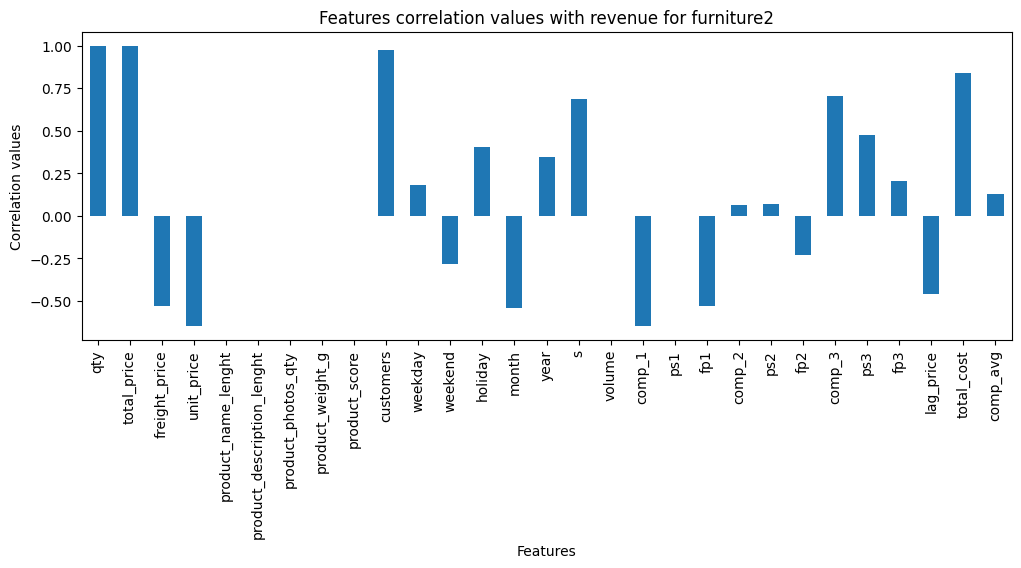

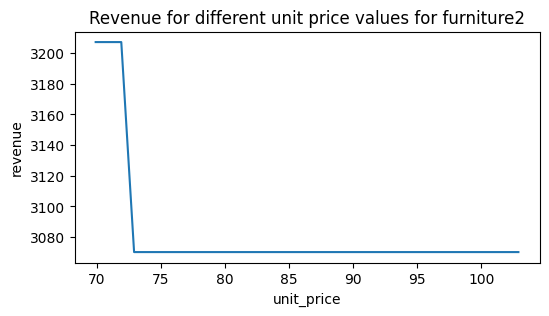

In [321]:
# lets find out for another product_id say furniture2

health_data = data[data['product_id'] == 'furniture2']

# call the function
test_results = get_optimal_price(health_data, 'furniture2')

In [322]:
# get the optimal price for furniture2
test_results[test_results['revenue'] > 3200].min()

unit_price      69.9
revenue       3207.1
dtype: float64

#### So, whenever the unit_price for furniture2 is somewhere less than 73, the revenue is max given other feature values constant. So, optimal price can be around 69 unit price.

### Final thoughts and recommendations
- Based on the above findings and the study, the strategy for finding the optimal price of a product is first very much dependent on the business goal, like whether to increase sales, or increase profits or overall revenue, decrease cost, etc. 
- Once the business goal is identified, again there are various strategy that we can used e.g. if we just focus on getting some marginal profit based on the cost, then we can implement Cost Plus Strategy which is simple and easier to implement but missed out many other factors that can cover the product value, competitors prices, market dynamics, etc.
- Then, there we discussed about Competitors pricing strategy which is again very important as it can give us agile in the competitive market. This also helps in identifying opportunities for differentiation, addressing pricing gaps and ensure that our price remains attractive to our target audience still keeping our business goal intact. Again, just using competitors pricing strategy may not be sufficient at times as we are missing our seasonal influence, trends, customer segmentation, etc.
- Then, we analyze a simple form of dynamic pricing based on quantity in Price Elasticity Demand. This has been a very good practice, optimizing our price value based on the demand, if we consider other features like product values and other items. For this dataset in particular, we are not able to capture much with this strategy.
- Finally, we check on a more advanced strategy using Random Forest Regressor, where we can get optimal price value considering not just the demand, but other relevant factors as well.
- In conclusion, embracing the power of machine learning and other advanced pricing strategies stands as a pivotal recommendation for unlocking unprecedented potential in optimizing our pricing model. The amalgamation of data-driven insights, dynamic pricing mechanisms, and predictive analytics not only positions us on the forefront of technological innovation but also equips us with the agility needed to navigate the complexities of the modern market landscape. By leveraging these sophisticated tools, we pave the way for precision, adaptability, and a profound understanding of customer behavior, ultimately leading to a pricing strategy that is not only optimal for our business but also responsive to the evolving dynamics of our industry. The future of pricing excellence lies in the synergy between human expertise and cutting-edge technology, and the adoption of machine learning represents a strategic leap toward achieving that synergy.

### References
- https://www.youtube.com/watch?v=z2QZfYMvQQ4
- https://blog.hubspot.com/sales/cost-plus-pricing
- https://stackoverflow.com/questions/68510853/competitors-price-analysis-using-python
- https://www.indeed.com/career-advice/career-development/cost-plus-pricing
- https://www.chargebee.com/resources/glossaries/competitive-pricing/
- https://www.javatpoint.com/retail-cost-optimization-using-python
- https://www.youtube.com/watch?v=_hPuStOTs8U